# Replicate Figure 3 of Ali et al. (2019)

I want to see how different the results from our code are from those of the experimental paper that inspired Muthukumar's adapted theory, performed by Ali et al. *ACS Macro. Lett.* 2019. The significant contribution of this paper was demonstrating LCST behavior in a complex coacervate. I want to try to reproduce its results as quantitatively as possible using Pengfei's code, having demonstrated that I can qualitative demonstrate the LCST behavior in `repl_adhikari_2019_fig4.ipynb`.

## Conversions from Experimental Results to Wang Group's Model

The experiment by Ali et al. (2019) uses the following physical conditions:

1. $T \in [0, 50]~C$, so we will use temperatures in $[273, 323]~K$ in our model, which they say leads to a Bjerrum length from 0.696 nm to 0.738 nm.
2. Polyanion concentration $c_{PSS} \in [0, 0.6]$ mol/L, with equimolar polycation
3. Salt concentration $c_{KBr} \in \{1.75, 2.0, 2.05\}$ mol/L

To relate these physical measurements to the theoretical values from the model, we must solve the following equations using the fact that the ratio of volumes of phases $I$ (dilute) and $II$ (polyelectrolyte-rich) can be used to calculate the total density of the system given the densities in each individual phase. Mathematically, this follows from the conservation of molecules,

\begin{align*}
    N_i^I + N_i^{II} &= N_i^{tot}\\
    \rho_i^{I}V^I + \rho_i^{II}V^{II} &= \rho_i^{tot}V^{tot}\\
    \rho_i^{I}V^I + \rho_i^{II}V^{II} &= \rho_i^{tot}(V^I + V^{II})\\
    (\rho_i^I - \rho_i^{tot})V^I &= (\rho_i^{tot} - \rho_i^{II})V^{II}\\
    \frac{\rho_i^{tot} - \rho_i^{II}}{\rho_i^I - \rho_i^{tot}} &= \frac{V^I}{V^{II}}\\
\end{align*}

This equation holds true for each individual species, polymer $p$ and salt $s$. The model gives us values for $\rho_i^I$ and $\rho_i^{II}$ for salt and polymer. We then enforce the total polymer density $\rho_p^{tot}$ from the experiment, which we calculate by converting the units of $c_{PSS}$ (which we double to account for polyanion and polycation, PDADMAB), as shown below,

\begin{align*}
    \rho_p^{tot} &= 2 c_{PSS} \left(\frac{\text{mol}}{\text{L}}\right) N_A \left(\frac{\text{molecules}}{\text{mol}}\right) N \left(\frac{\text{monomers}}{\text{molecule}}\right) 1000 \left(\frac{\text{L}}{\text{m}^3}\right) \sigma^3 \left(\frac{(\sigma~\text{value in m}^3)}{\text{units of}~\sigma^3}\right)\\
    &= 2000N_A N \sigma^3 c_{PSS} \left(\frac{\text{monomers}}{\text{units of}~\sigma^3}\right)\\
\end{align*}

where $\rho_p^{tot}$ is the density of monomers per units of $\sigma^3$ of polymer in the total system, $\sigma$ is the hard-sphere diameter, $c_{PSS}$ is the overall concentration of polyanion $PSS$ in the system in mol/L, $N_A$ is Avogadro's number, and $N$ is the degree of polymerization of the polymers (assuming symmetric polymers, which is not actually true but a reasonable approximation since $M_w = 200$ kg/mol for KPSS and $M_w = 150$ kg/mol for PDADMAB). We se that we have two parameters that we cannot directly calculate from the data provided in Ali et al.:

1. $\sigma$, the bead diameter. This is also the length scale that non-dimensionalizes the Bjerrum length $l_B$ and the densities $\rho$. 
2. $N$, the degree of polymerization.

Note that the polyelectrolytes are not symmetric in the experimental study but are pretty close (200 and 150 kg/mol molecular weights). We show the different monomers of related molecules below:

<div>
    <img src="figures/pdadmac.png" alt="Drawing" style="width: 200px;"/>
</div>

PDADMAC differs from PDADMAB, the polycation used in the experimental study, by having a $Cl^-$ counteranion instead of a $Br^-$ counteranion, so the polycations are identical. In the study $M_w = 150$ kg/mol. The molecular weight of each monomer is about 161.5 g/mol (16 $H$, 8 $C$, 1 $N$, and 1 $Cl$). Thus, there are about **930 monomers per molecule.** 

<div>
    <img src="figures/polystyrene_sulfonate.png" alt="Drawing" style="width: 100px;"/>
</div>

Polystyrene-sulfonate (PSS) is the polyanion used in this study. $KPSS$ indicates that there is an associated $K^+$ countercation. The molecular weight of each monomer is about 222 g/mol (7 $H$, 8 $C$, 1 $S$, 3 $O$, and 1 $K$). In the study, $M_w = 200$ kg/mol. Thus, there are about **901 monomers per molecule.** The polymers are fairly close to symmetric.

We must estimate these values through some sort of fitting procedure. I will try different values in the ballpark that we expect and see which get closest to fitting the data of Ali et al. (2019). If it becomes important, I will perform a more sophisticated fitting procedure.

Given that the length of a $C-C$ bond is about 150 pm, and the width of each of these monomers is about two $C-C$ bonds, I would suggest a monomer size of 300 pm as a ballpark estimate, which could be a reasonable ballpark estimate of the hard-sphere diameter as well.

Now, how do we determine $N$? We are given that the appropriate hard-sphere diameter is $\sigma = 4$ A for the non-dimensional Bjerrum length to match known value for water at room temperature (see the end of Zhang et al. *Macromol.* 2016).

First, I will estimate $N$ for the polyanion, poly(styrene-sulfonate) (PSS).

1. Degiorgio et al. 1991 measured a contour length $L =$ 2426 A for a PSS polymer of molecular weight 200 kg/mol. We can relate the contour length to the bead size by $L = N\sigma$. For $\sigma = 4$ A, $N \approx 606$. (https://iopscience-iop-org.clsproxy.library.caltech.edu/article/10.1209/0295-5075/15/1/013/pdf)

2. Prabhu et al. 2001 measured that the length of the fully extended rod-like formation of PSS with a molecular weight of 52400 g/mol was about 200 A. (last paragraph of p. 8939). This would correspond to a fully extended length of $200,000/52400 \times 200$ A $= 763$ A contour length estimated for the polymer in the present study. This would suggest $N = 763 / 4 \approx 191$. Much smaller than the previous example (https://www.ncnr.nist.gov/programs/sans/pdf/publications/0131.pdf).

3. Pavlov et al. 2011 measured for their sample 1 of poly(styrene-4-sulfonate) in water (no salt) that the ratio of the contour length to the Kuhn length was 1.6 (Table 2). They estimated that the Kuhn length was about 650 nm (Table 2). They also measured that the molecular weight was about 800 kg/mol. ($M_{sD}$ in Table 1). Thus, they would estimate a contour length of $L = 1.6 \times 650 \times \frac{800}{200} \times 10$ A $\approx 2600$ A, similar to the value from the estimate in bullet point 1. Given this contour length, $N = 2600 / 4 \approx 650$. (https://link.springer.com/article/10.1134/S0965545X11110095)

Now I will make some estimates for $N$ of the polycation, PDADMA+.

1. Dautzenberg et al. (1998) measured for their sample PDM 7 of PDMAMAC (so it has a chloride counterion instead of the bromide in Prabhu et al.) a molecular weight between 139-244 kg/mol (so it roughly matches the 150 kg/mol in Prabhu et al.), a Kuhn length of $l_K$ = 4.9 nm (in NaCl solution), and a radius of gyration $R_G = $ 29.4 nm. They also measured parameters to calculate the contour length $L = l_0 \cdot M / M_0 $ (below eqn 12), with the monomer length $l_0 = $ 0.55 nm, the monomer molecular weight $M_0 = 161.5$ g/mol, and the molecular weight $M \approx 150 $ kg/mol, resulting in $L = 550 nm$. For a bead size of 4 A, this would mean $N = 1375$, much larger than the estimates above for PSS. (https://onlinelibrary.wiley.com/doi/abs/10.1002/(SICI)1521-3935(19980801)199:8%3C1561::AID-MACP1561%3E3.0.CO;2-9?casa_token=gt0Jz3h1ik4AAAAA:6apPuk5rpMdbFFDFhqim2m1uS-BeNirWb3oS2Fuw87WEsJvXhHSvzVhhMLdS-XjSRPOiKN0iGHReYCgh)

In [1]:
import numpy as np
import glob
import pandas as pd
import matplotlib.pyplot as plt

import salt
import pe
import plot
from bokeh.io import output_notebook
from bokeh.plotting import show
from bokeh.models import Range1d

from importlib import reload
reload(salt)
reload(pe)

output_notebook()


# USER PARAMETERS
data_folder = 'salt/no_vdw/'
Z = 1 # charge per monomer (same for polyanion and polycation)
# array of temperatures in range considered in Adhikari et al. (2019)
T_arr = np.linspace(273, 323, 10)
# list of salt [KBr] concentrations [mol/L]
rho_s_list = [1.75, 2.0, 2.05]
# list of polyanion [PSS] concentrations [mol/L]
rho_p_list = [0.15, 0.3]
# list of hard-sphere diameters to try [m]
sigma_arr = np.linspace(100, 1000, 5)*1E-12
# accurate choice for sigma based on Bjerrum length of water (see Zhang et al. 2016)
sigma = 4E-10 # [m]
# list of degrees of polymerization to try
N = 100
# Avogadro's number [molecules/mol]
NA = 6.022E23
# conversion of meters^3 to L
m3_2_L = 1E3
# conversion of meters to Angstroms [A]
m_2_A = 1E10
# conversion from beads/sigma^3 to mol/L (M)
beads_2_M = (NA * sigma**3 * m3_2_L)**(-1)

Loading BokehJS ...

## Load Data

In [2]:
data = salt.load_data(data_folder)

Loading data for lB = 3.150 failed.
Loading data for lB = 3.200 failed.
Loading data for lB = 3.250 failed.


## Bjerrum Length vs. T

We plot the temperature dependence of the Bjerrum length to demonstrate that it increases monotonically with temperature.

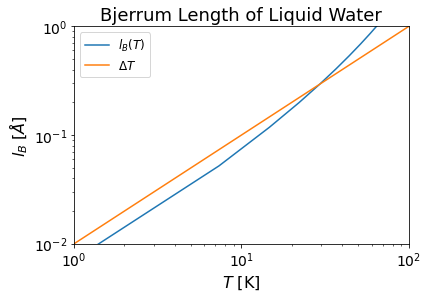

In [32]:
# plot parameters
ax_fs = 16
t_fs = 18
tk_fs = 14
l_fs = 12

# Computes Bjerrum length in desired temperature range
lB_arr = pe.lB_fn(T_arr, sigma=sigma)
lB_A_arr = lB_arr*sigma*m_2_A

# plots Bjerrum Length vs. Temperature
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(T_arr - T_arr[0], lB_A_arr - lB_A_arr[0], label=r'$l_B(T)$')

# plots sloped lines
x = np.linspace(0, 100, 1000)
y = x/1E2
ax.plot(x, y, label=r'$\Delta T$')

# formats plot
ax.set_xlabel(r'$T$ [K]', fontsize=ax_fs)
ax.set_ylabel(r'$l_B$ $[\AA]$', fontsize=ax_fs)
ax.set_title('Bjerrum Length of Liquid Water', fontsize=t_fs)
ax.tick_params(axis='both', labelsize=tk_fs)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim([1, 100])
ax.set_ylim([0.01, 1])
plt.legend(fontsize=l_fs)

## Matching to Experiment

To match the results of the computation to experiments, we must select a polymer concentration that is within the bounds of the calculation. This means we want the minimal maximum as the upper bound and the maximal minimum of polymer concentration across all temperatures of interest (0-50 C).

In [4]:
lB_bnd = [1.75, 2.34]
rho_p_bnd = [0, 1E9]
rho_s_bnd = [0, 1E9]

for lB in data.keys():
    if not (lB_bnd[0] <= lB <= lB_bnd[1]):
        continue
    df = data[lB]
    
    # maximum of the minimum density of polymer in the dilute phase (I)
    rho_p_bnd[0] = max(rho_p_bnd[0], 2*np.min(df['rhoPCI'])) 
    # minimum of the maximum density of polymer in the dense phase (II)
    rho_p_bnd[1] = min(rho_p_bnd[1], 2*np.max(df['rhoPCII']))
    
    # maximum of the minimum density of polymer in the dilute phase (I)
    rho_s_bnd[0] = max(rho_s_bnd[0], np.min(df['rhoCI'])) 
    # minimum of the maximum density of polymer in the dense phase (II)
    rho_s_bnd[1] = min(rho_s_bnd[1], np.max(df['rhoCII']))
    
print('Polymer concentration bounds: {0:f} M to {1:f} M.'.format(rho_p_bnd[0]*beads_2_M, rho_p_bnd[1]*beads_2_M))
print('Salt concentration bounds: {0:f} M to {1:f} M.'.format(rho_s_bnd[0]*beads_2_M, rho_s_bnd[1]*beads_2_M))

Polymer concentration bounds: 0.000000 M to 5.293033 M.
Salt concentration bounds: 0.123950 M to 1.848424 M.


Clearly the data from the liquid-state model cannot match the Ali et al. paper because the paper used salt concentrations from 1.75-2.05 M. This is okay because we don't expect quantitative agreement. 

To determine the range of salt and polymer concentrations that are consistent with the liquid state model, I will plot the possible values for different fractions of phase I from 0 to 1.

C:\Users\andyl\anaconda3\envs\py36\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning:

The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.

C:\Users\andyl\anaconda3\envs\py36\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning:

The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.

C:\Users\andyl\anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



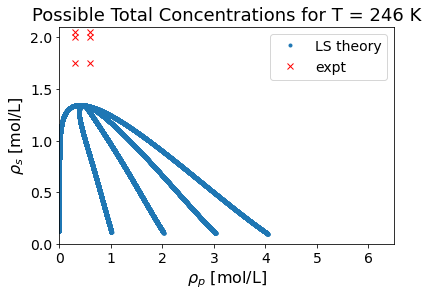

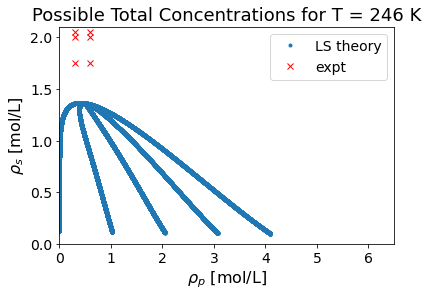

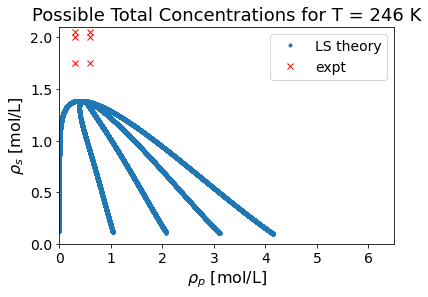

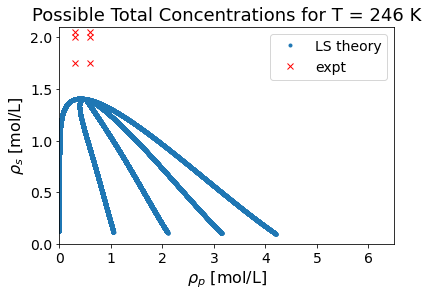

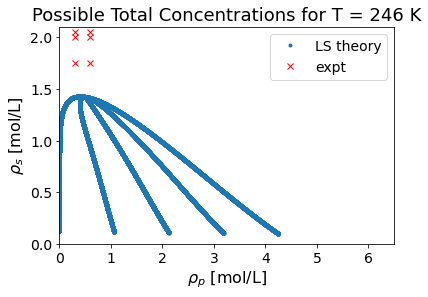

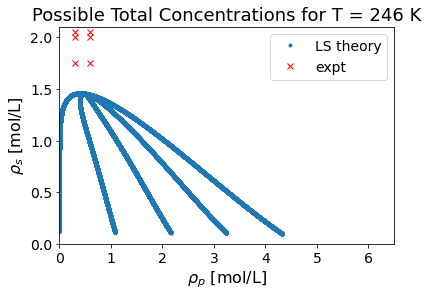

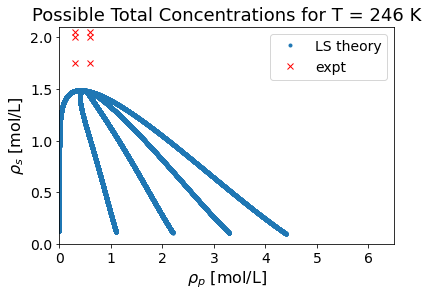

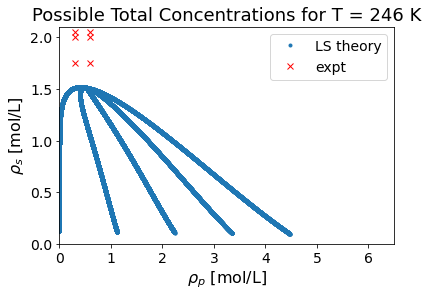

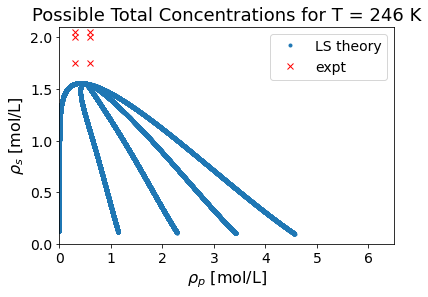

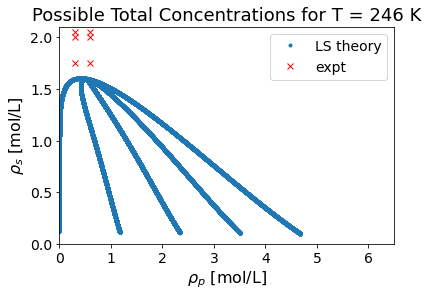

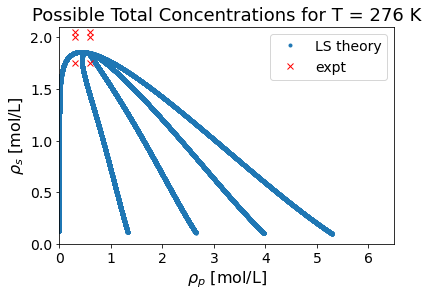

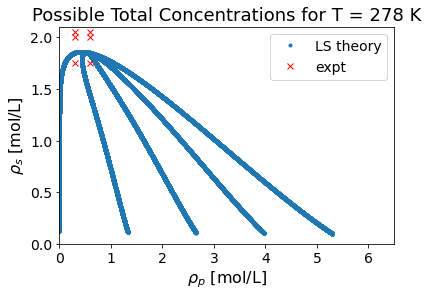

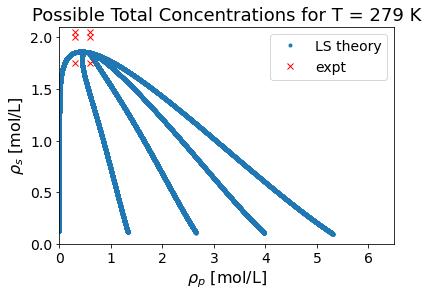

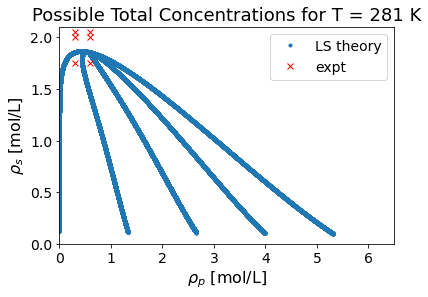

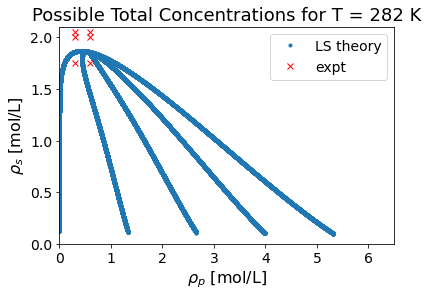

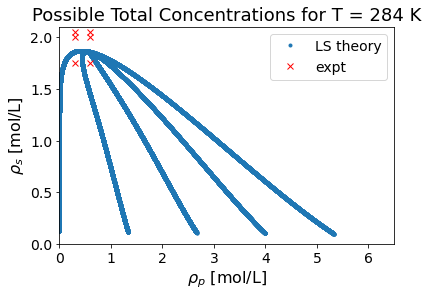

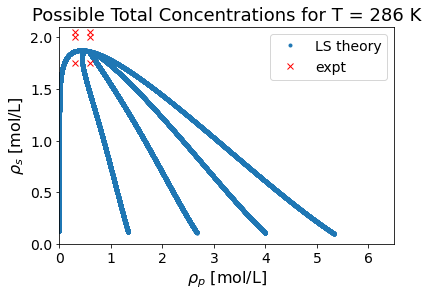

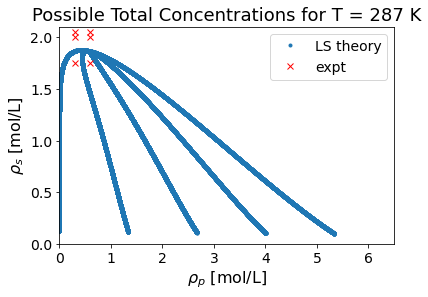

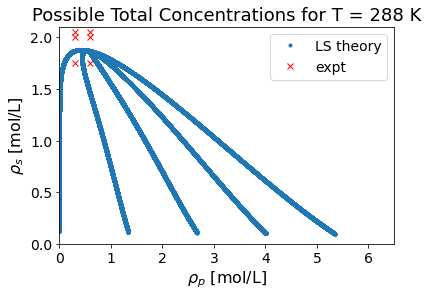

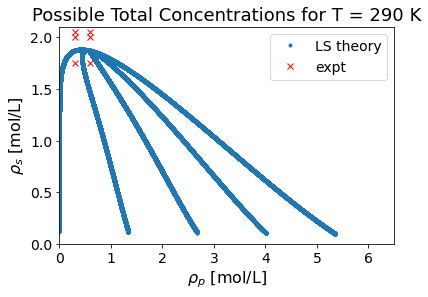

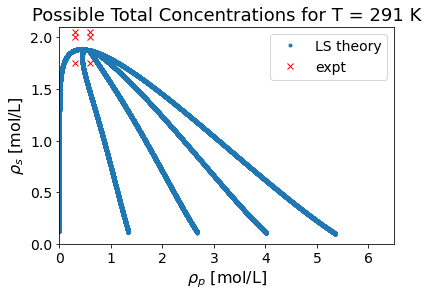

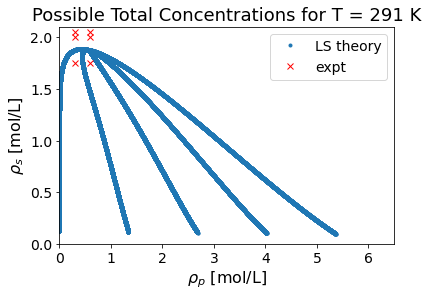

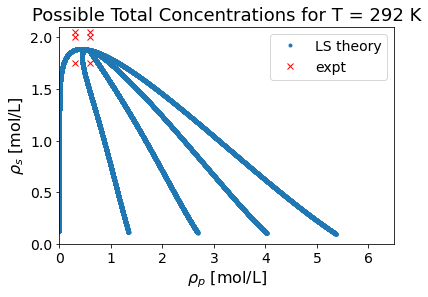

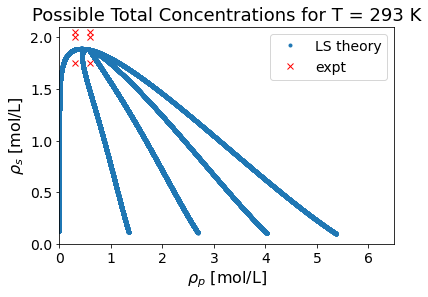

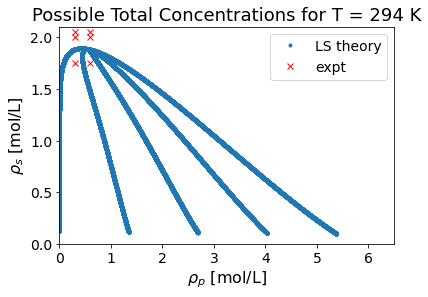

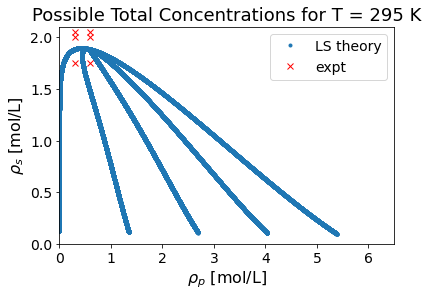

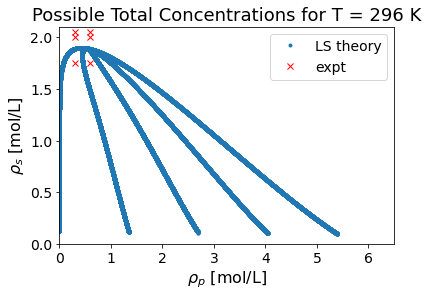

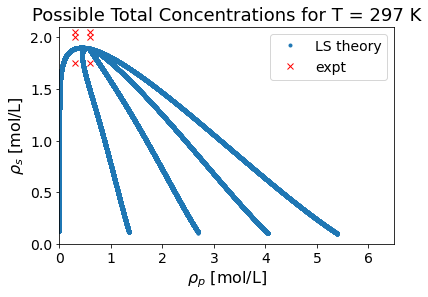

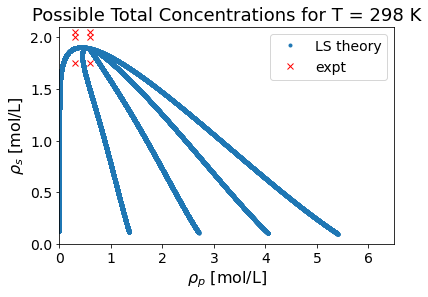

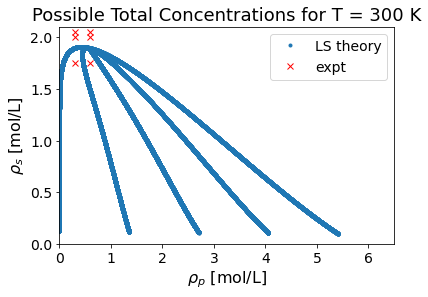

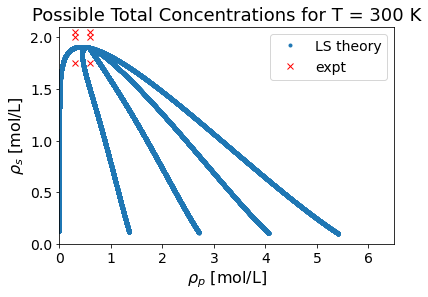

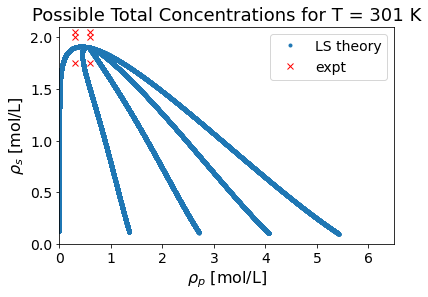

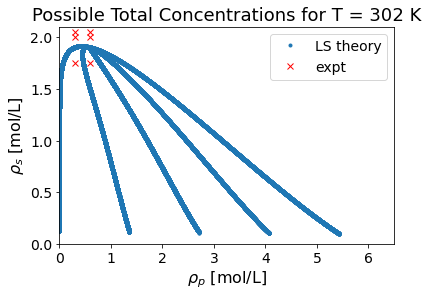

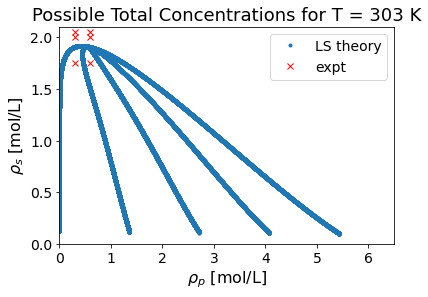

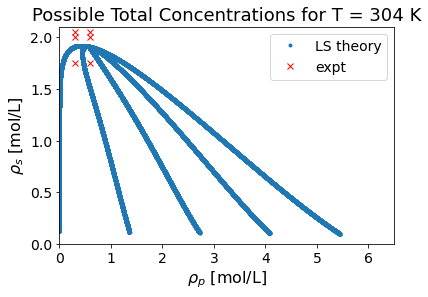

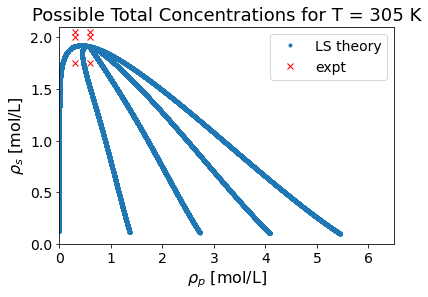

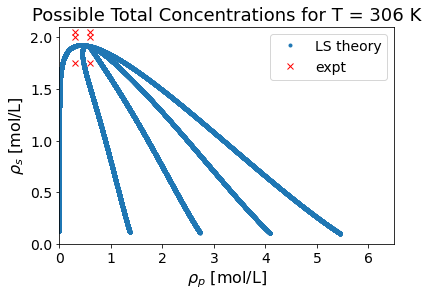

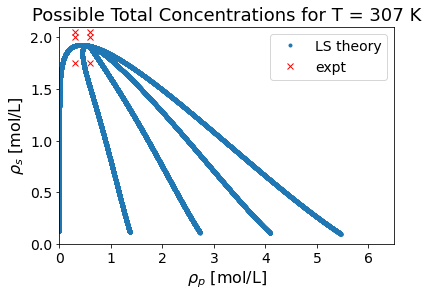

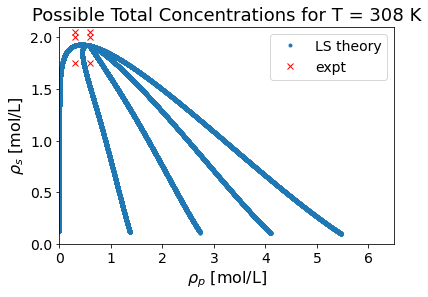

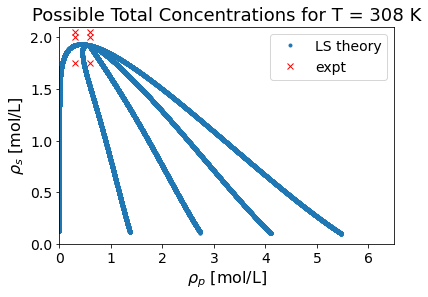

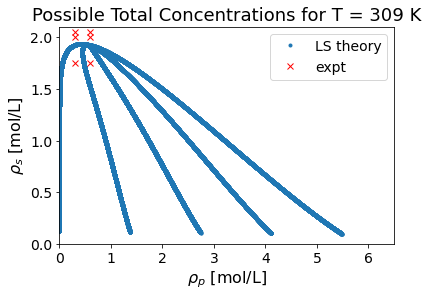

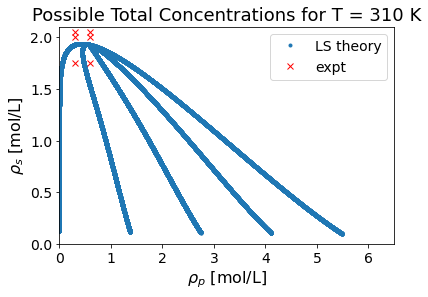

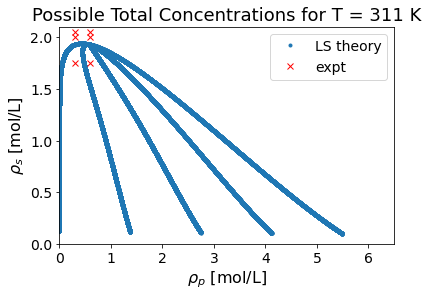

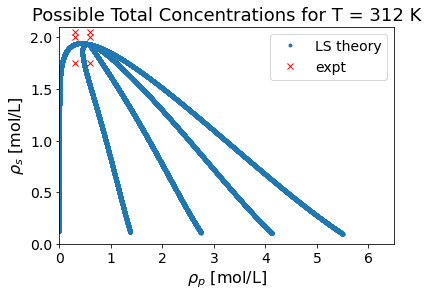

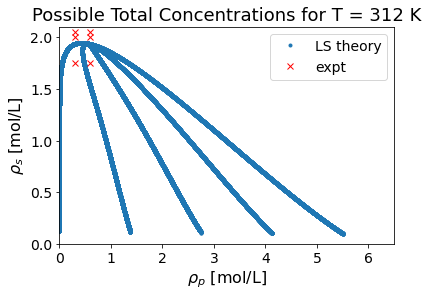

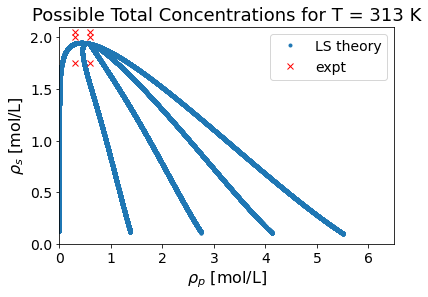

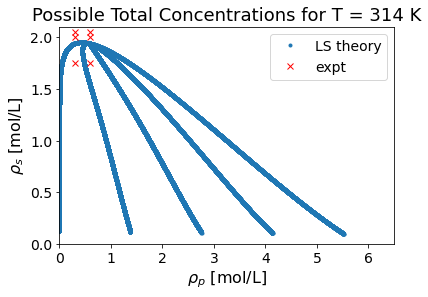

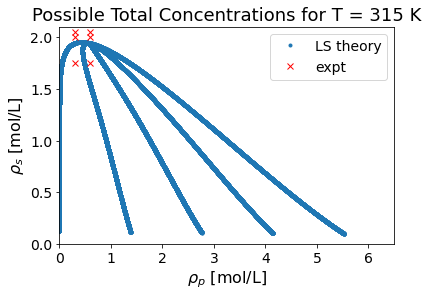

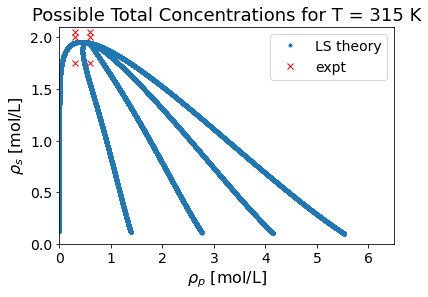

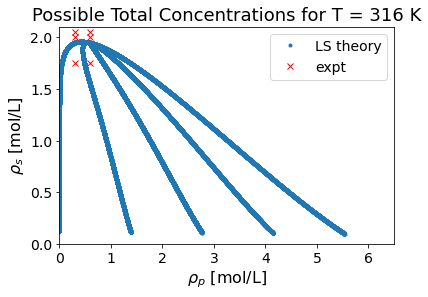

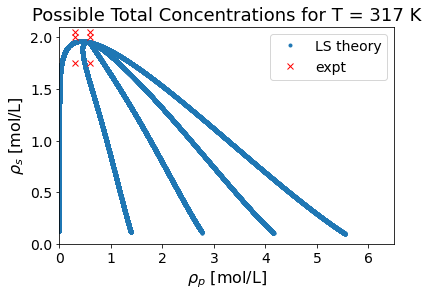

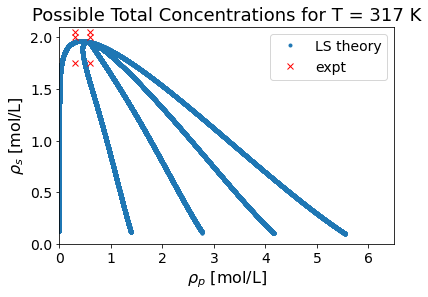

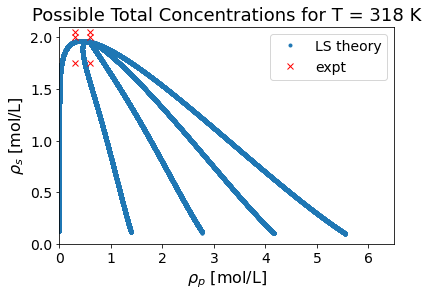

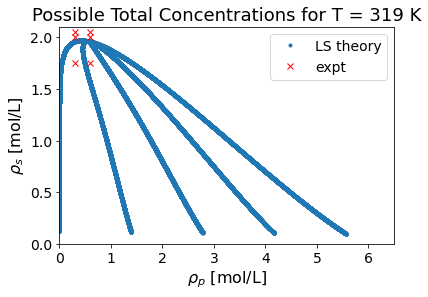

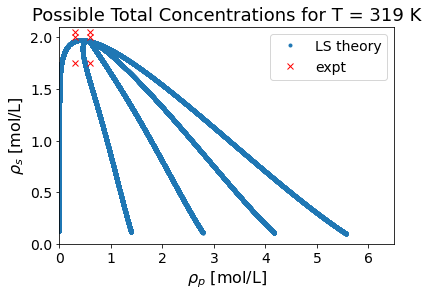

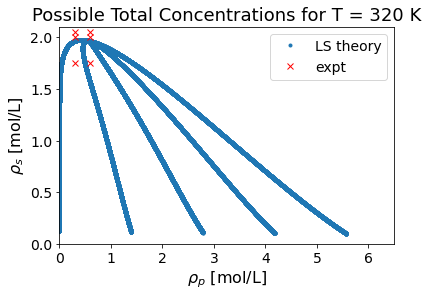

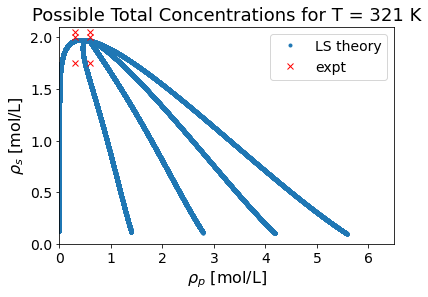

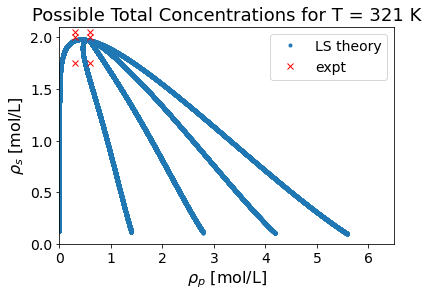

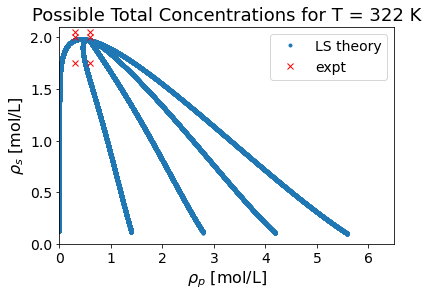

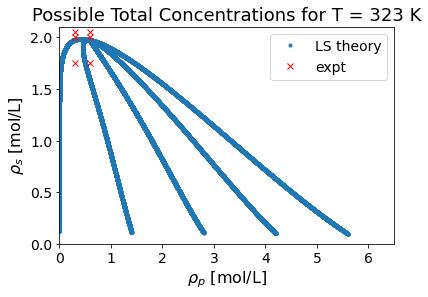

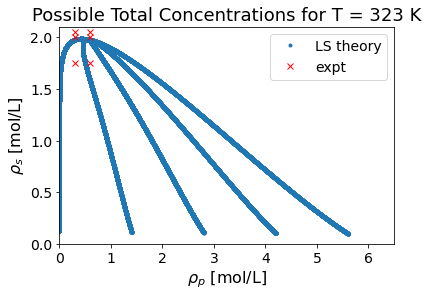

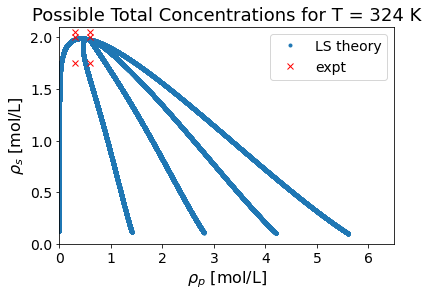

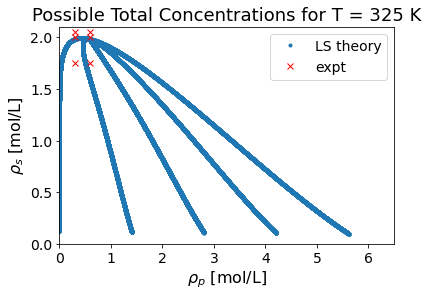

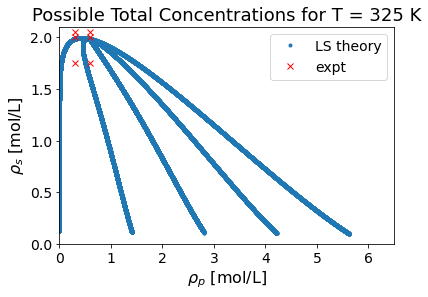

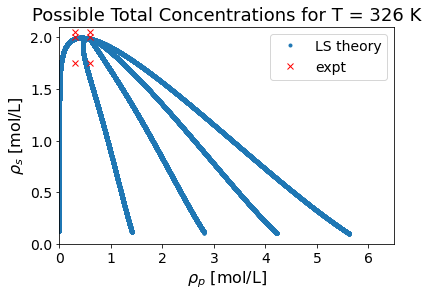

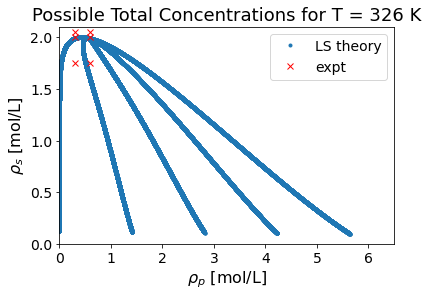

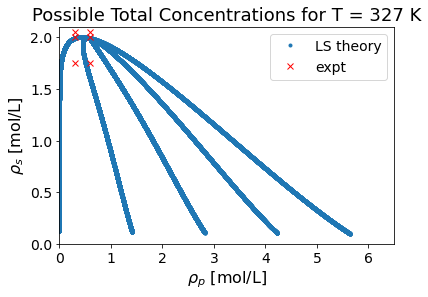

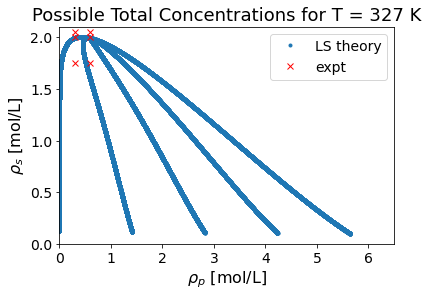

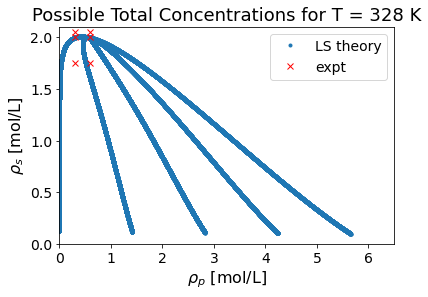

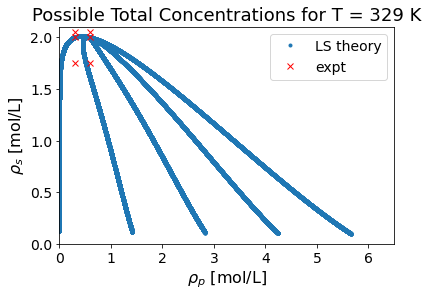

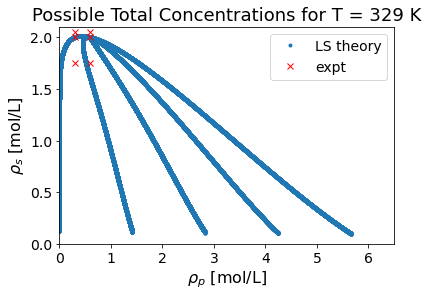

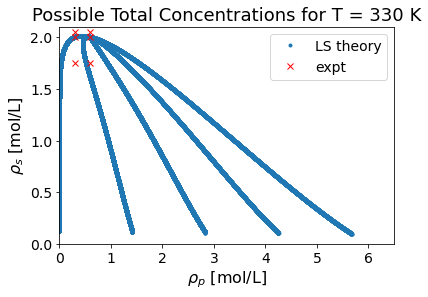

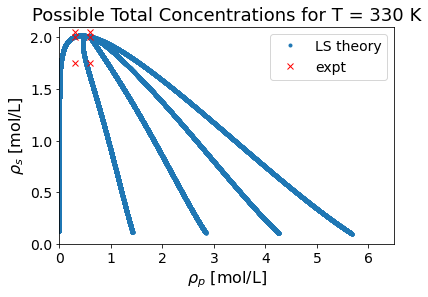

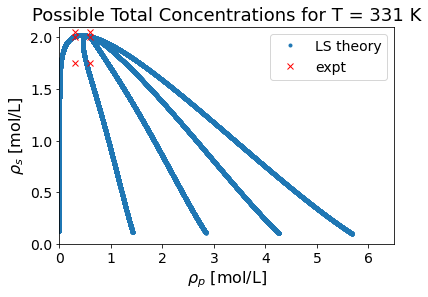

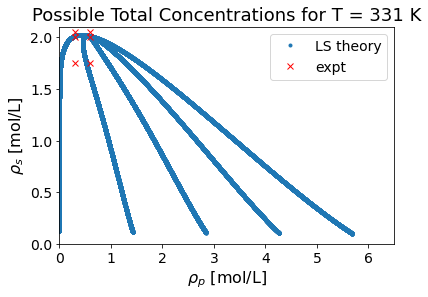

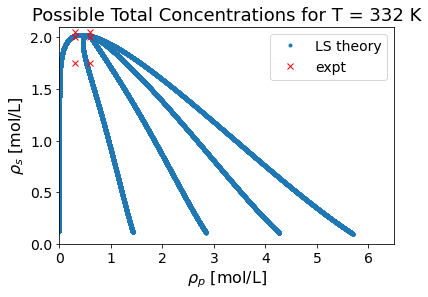

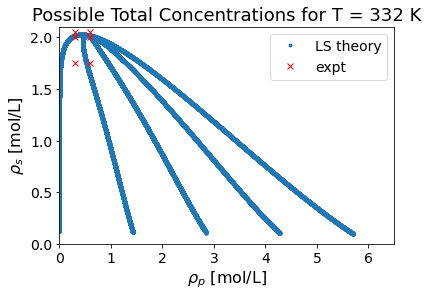

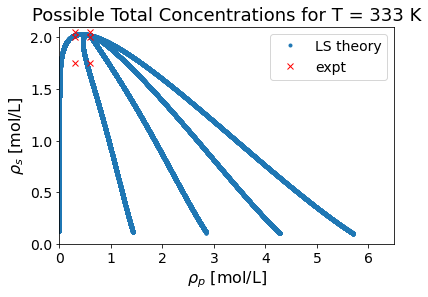

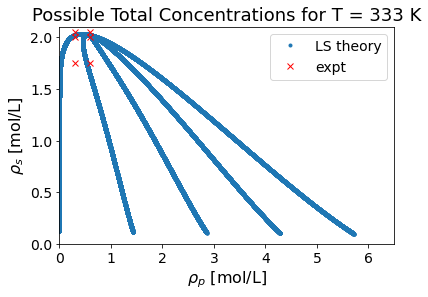

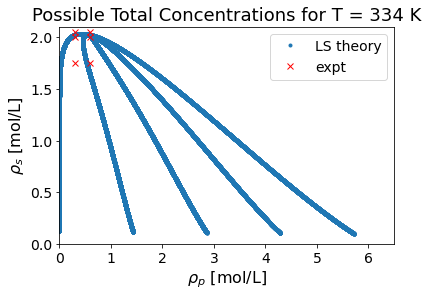

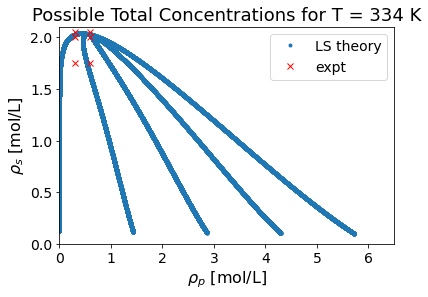

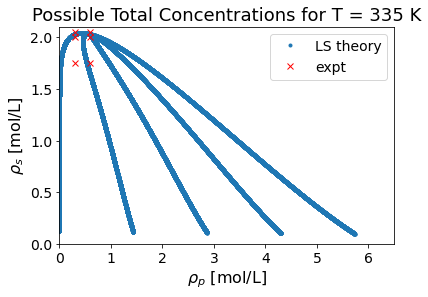

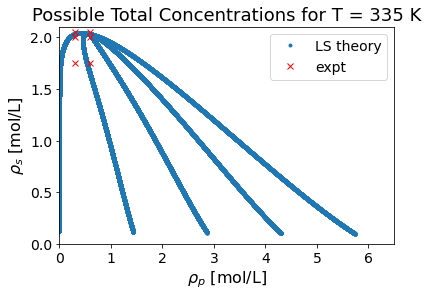

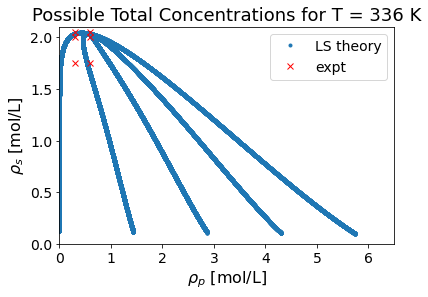

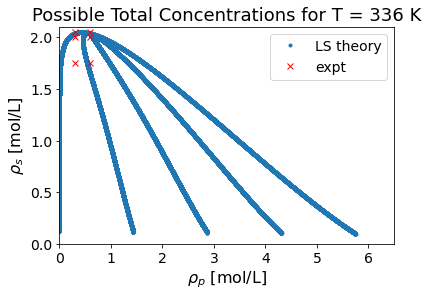

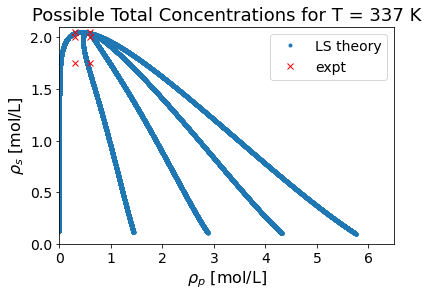

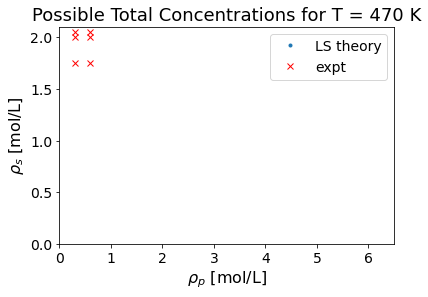

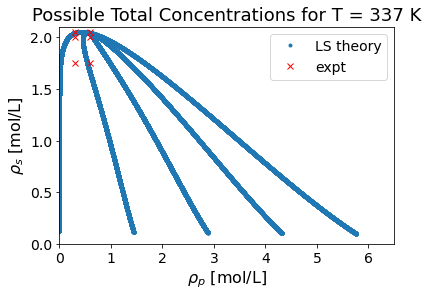

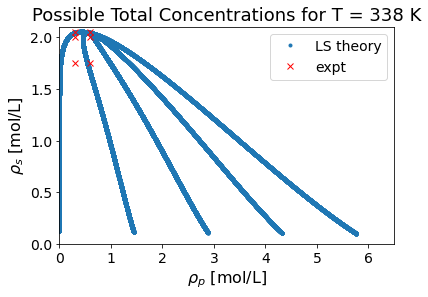

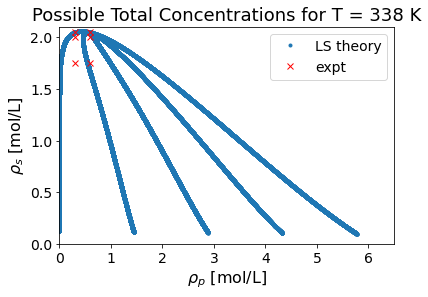

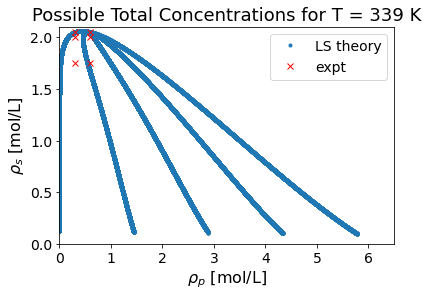

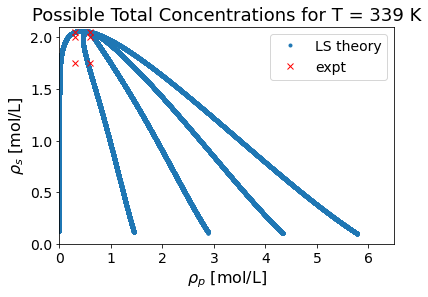

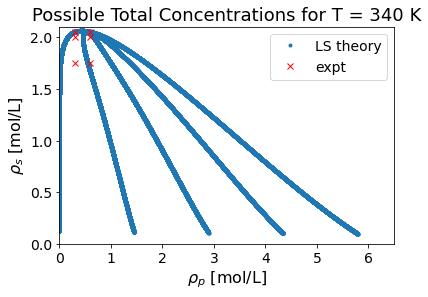

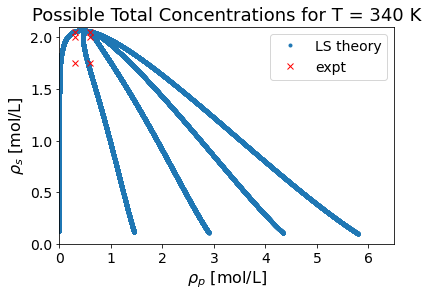

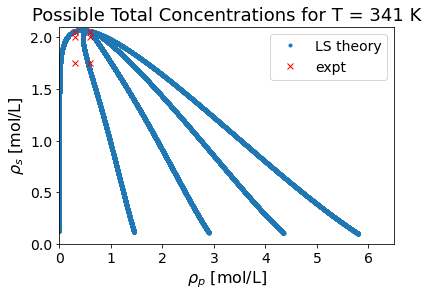

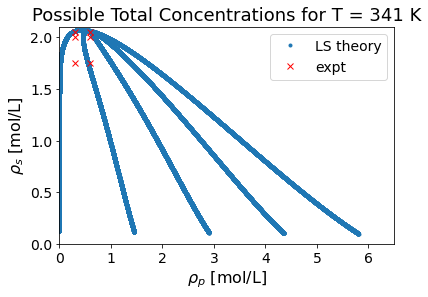

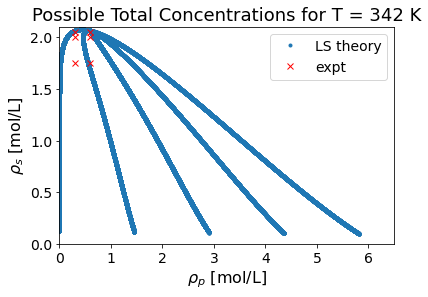

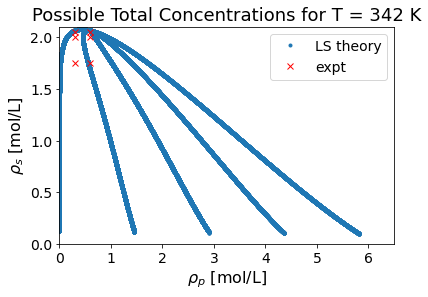

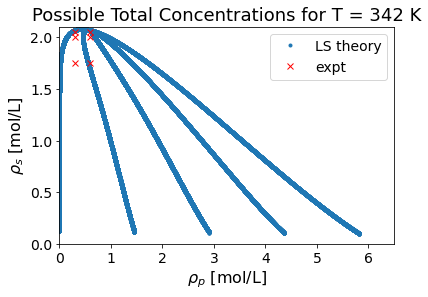

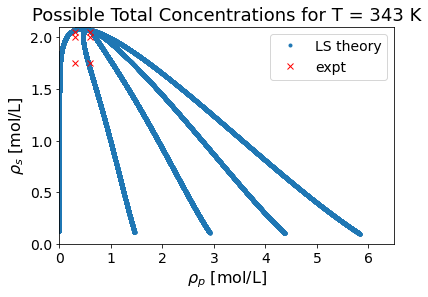

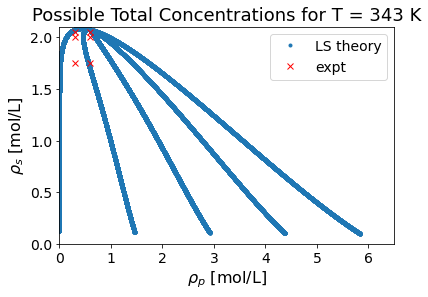

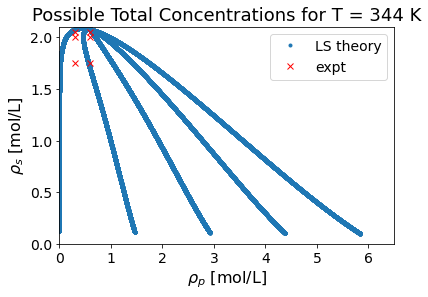

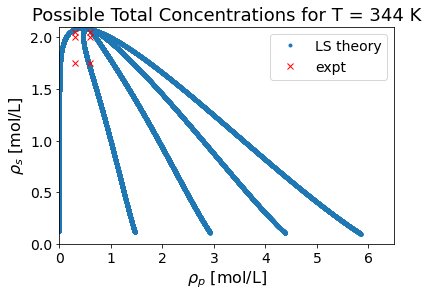

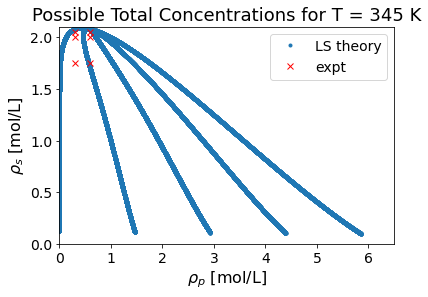

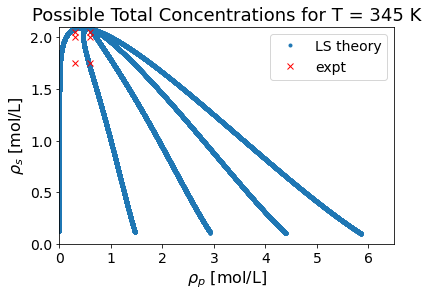

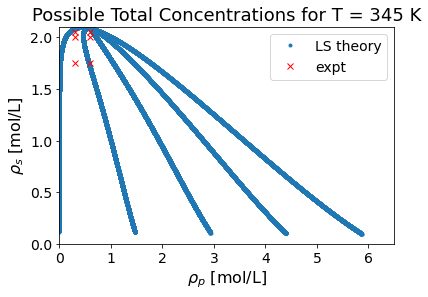

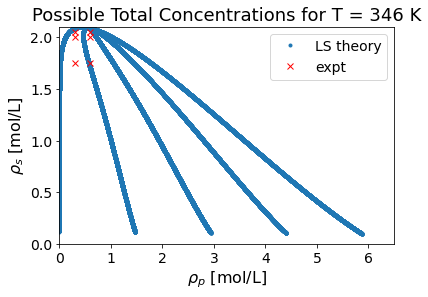

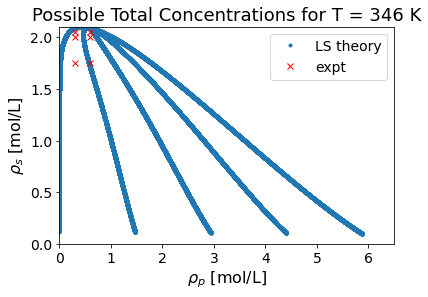

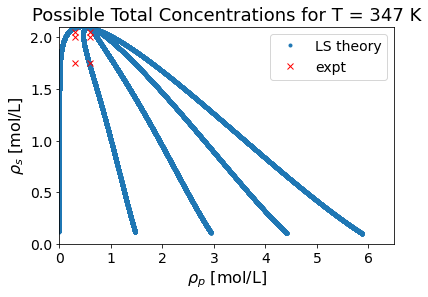

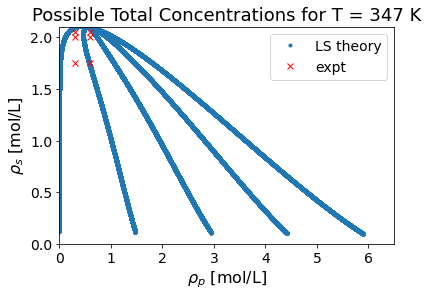

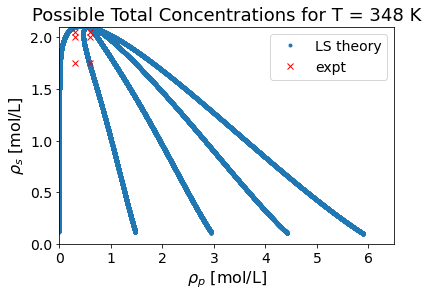

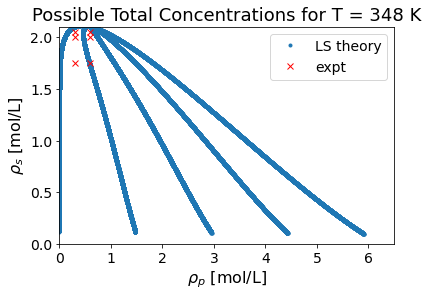

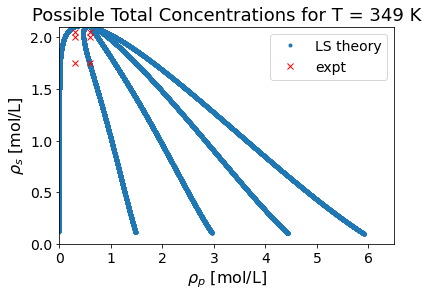

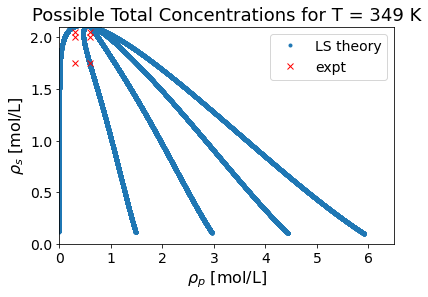

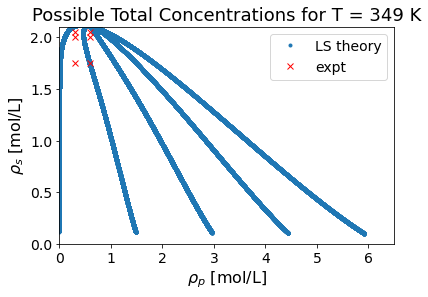

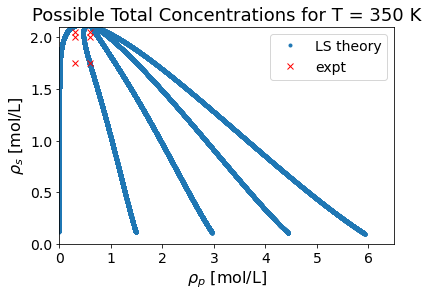

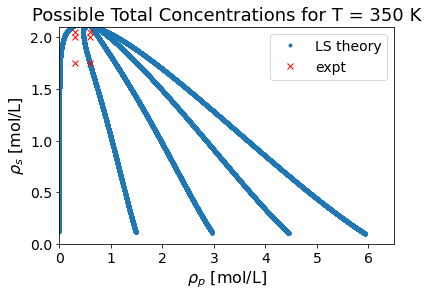

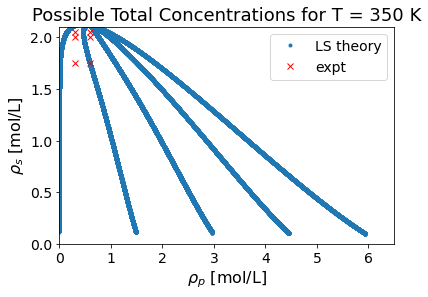

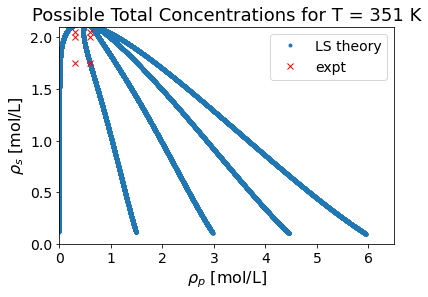

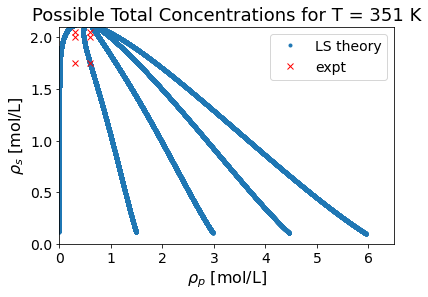

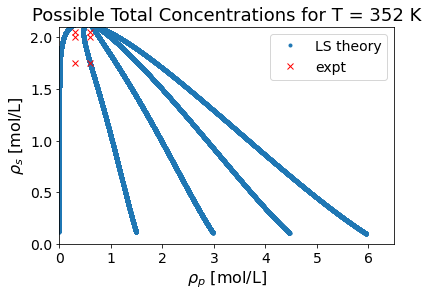

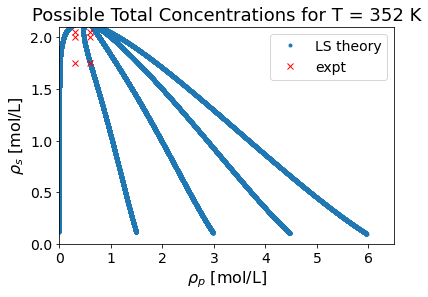

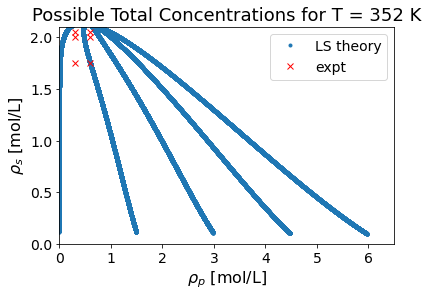

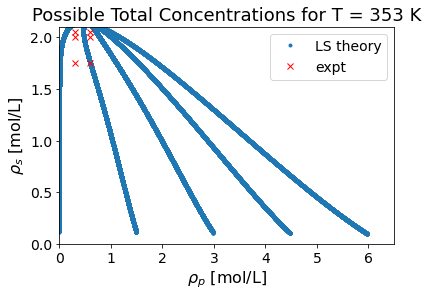

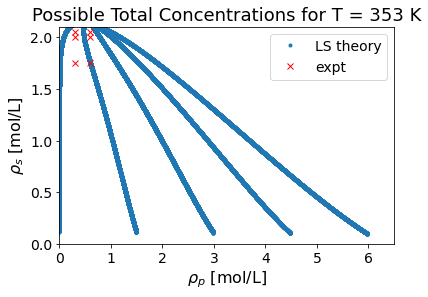

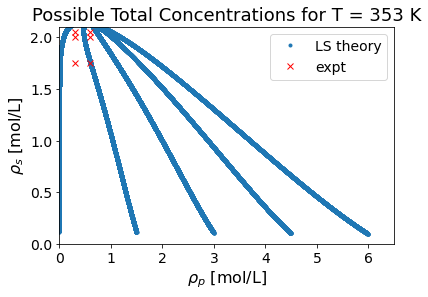

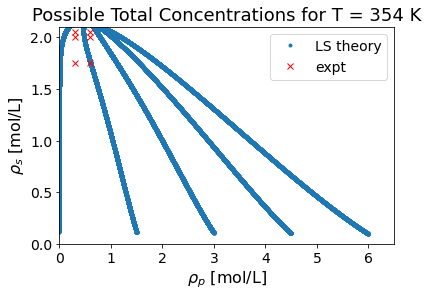

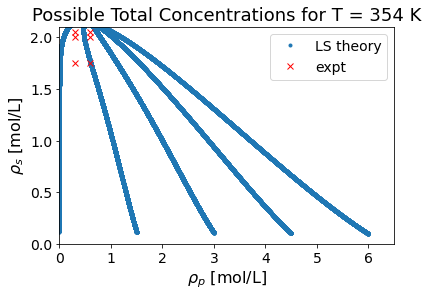

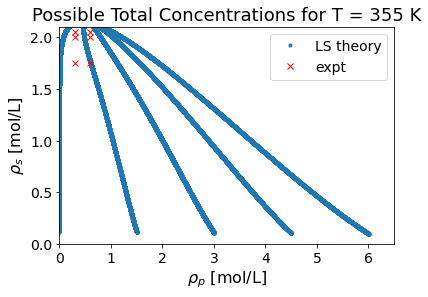

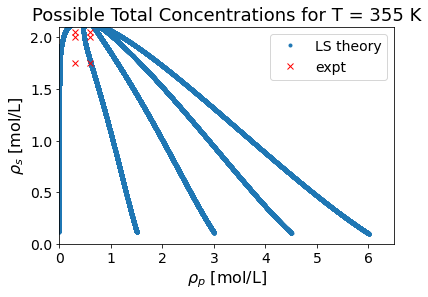

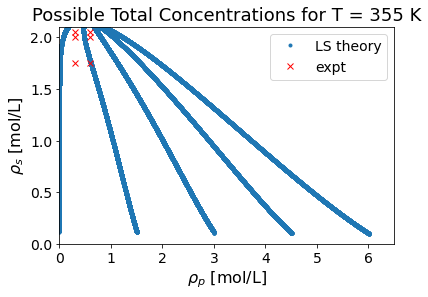

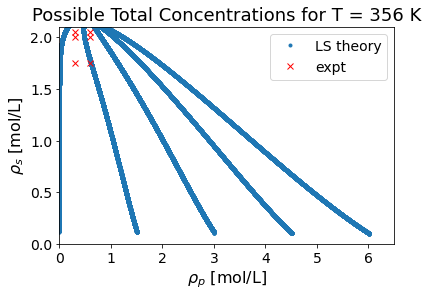

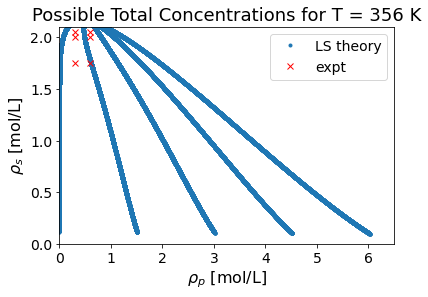

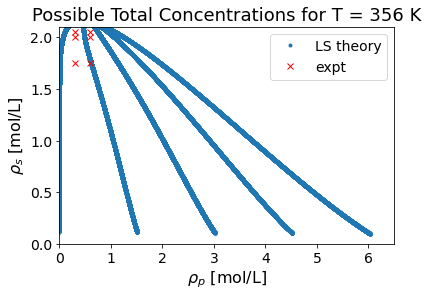

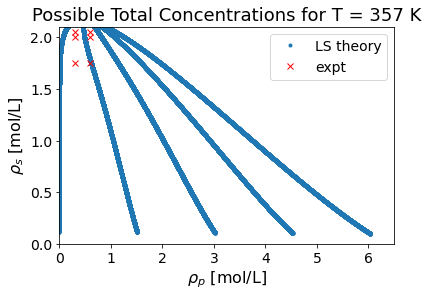

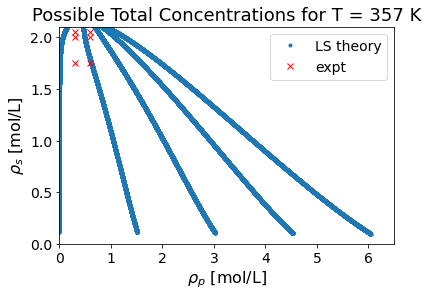

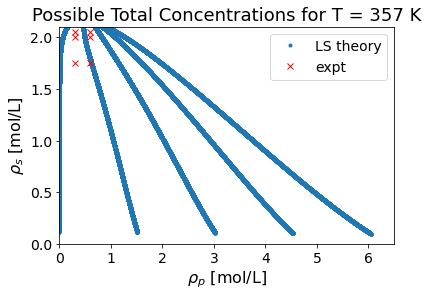

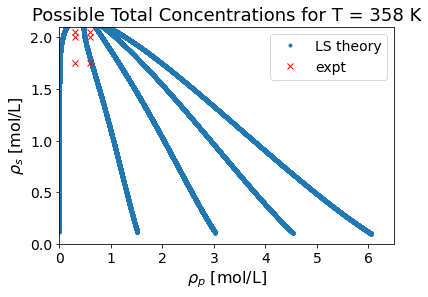

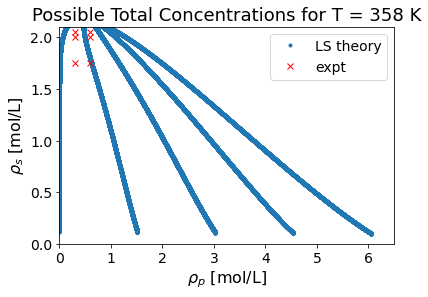

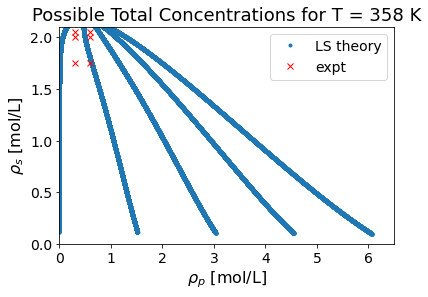

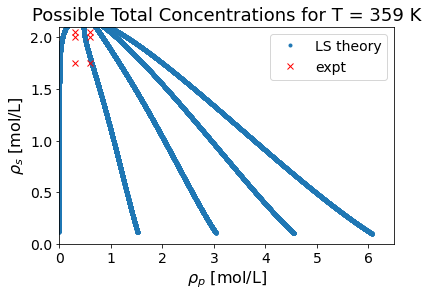

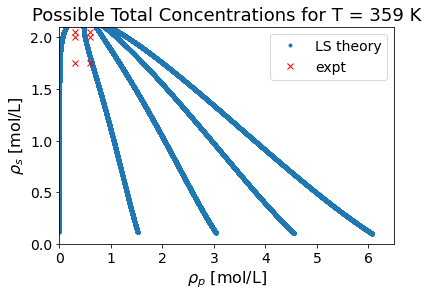

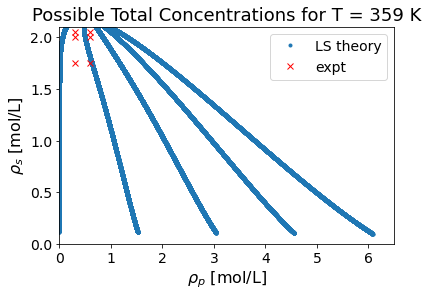

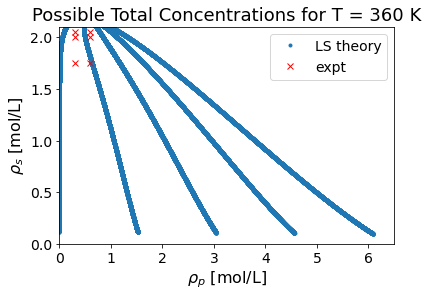

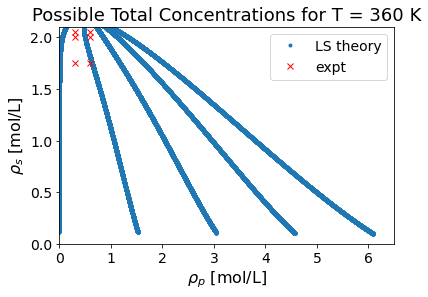

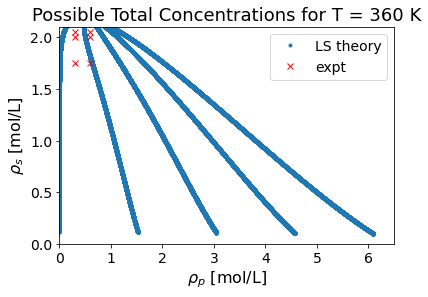

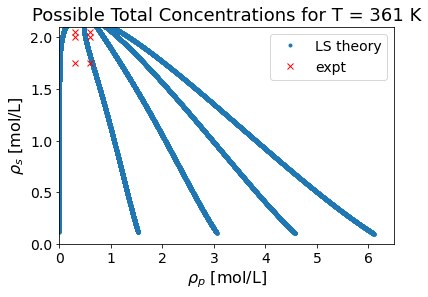

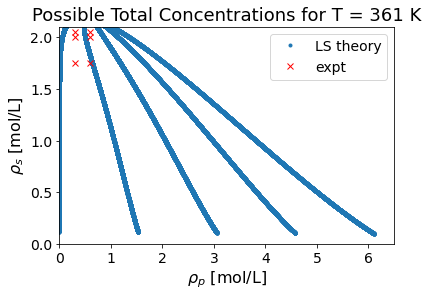

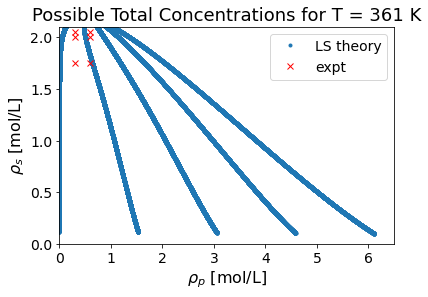

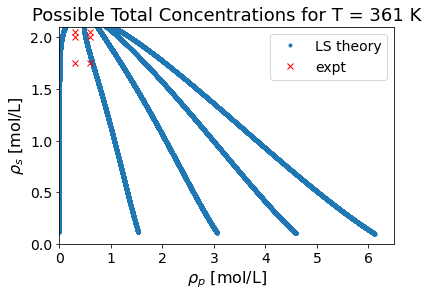

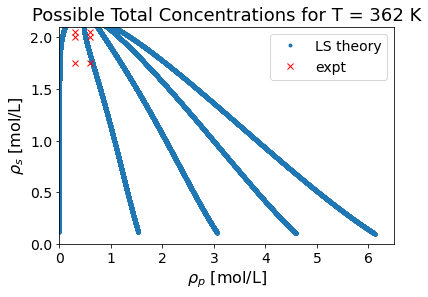

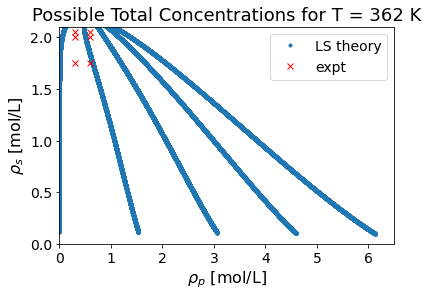

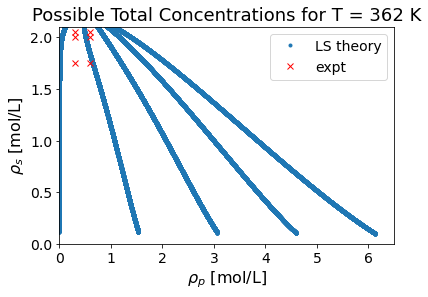

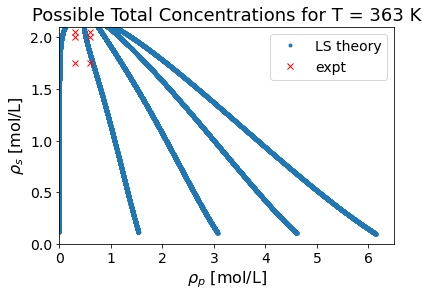

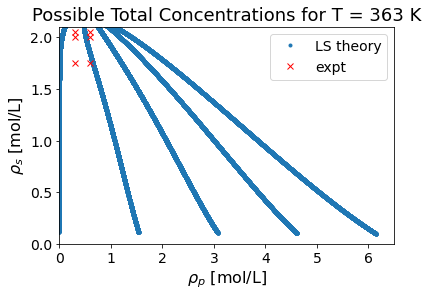

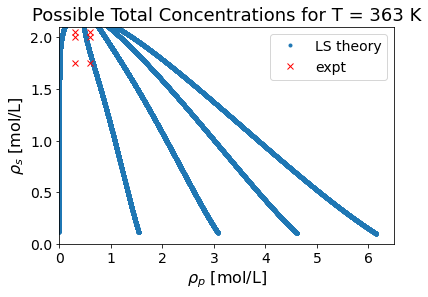

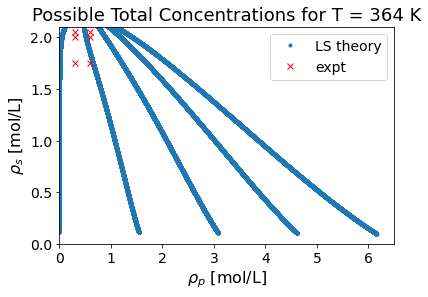

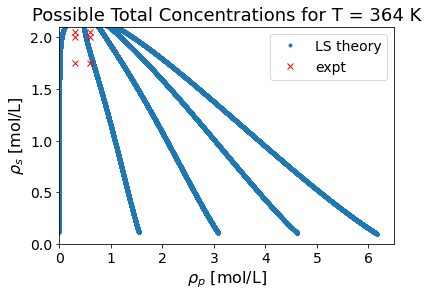

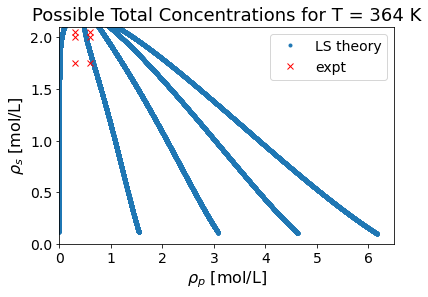

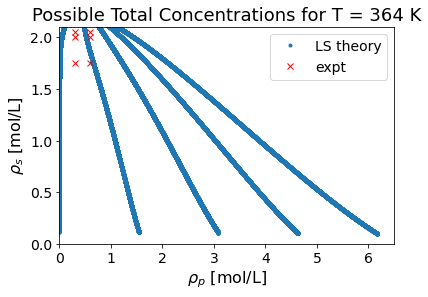

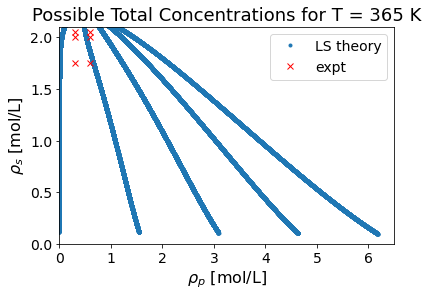

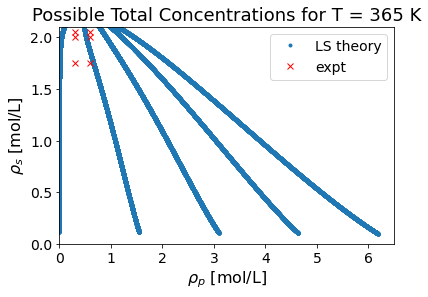

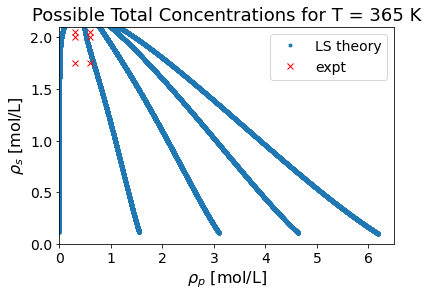

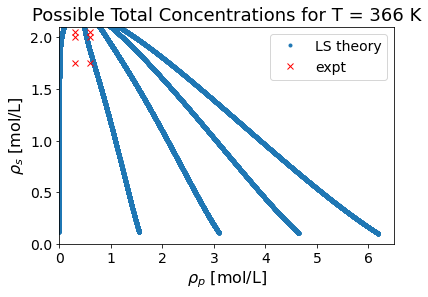

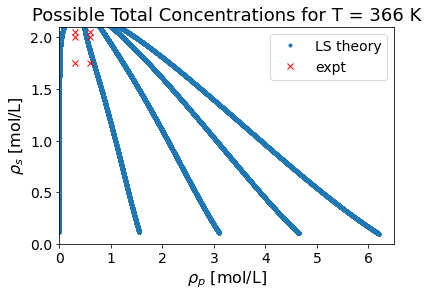

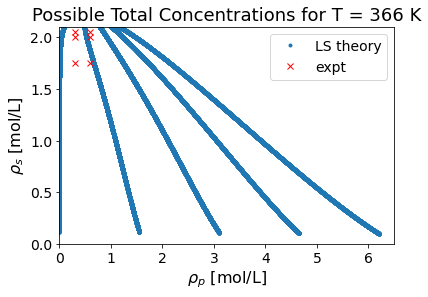

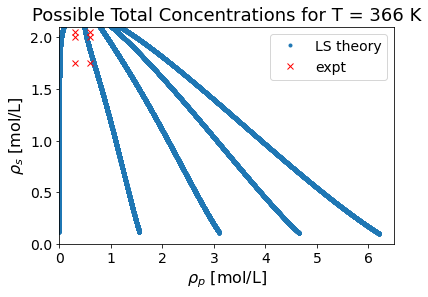

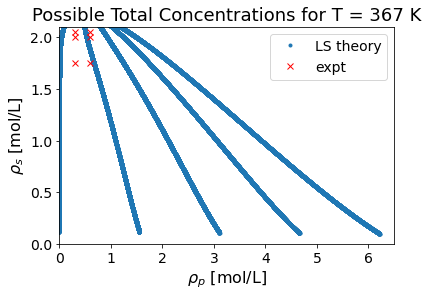

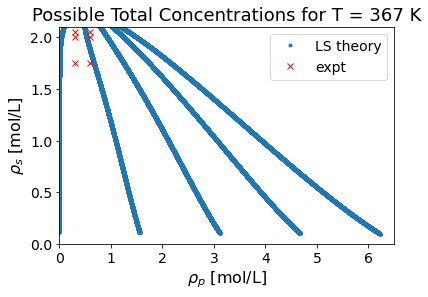

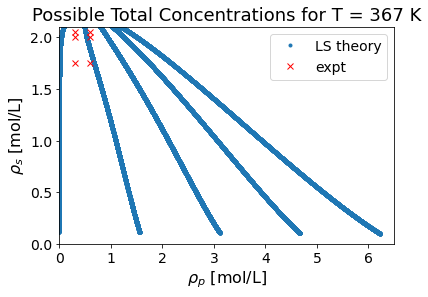

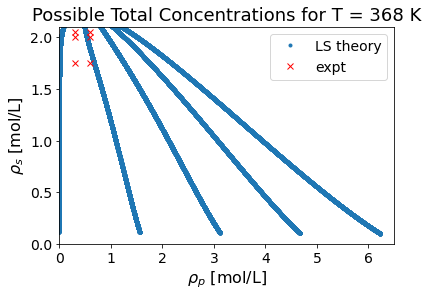

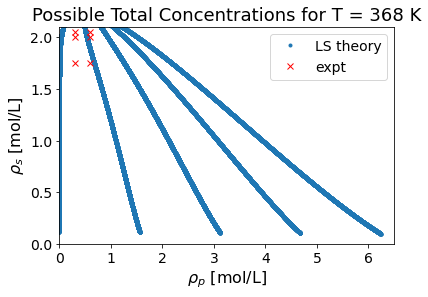

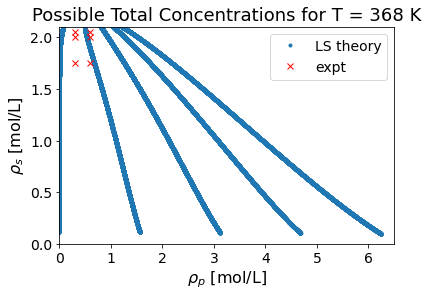

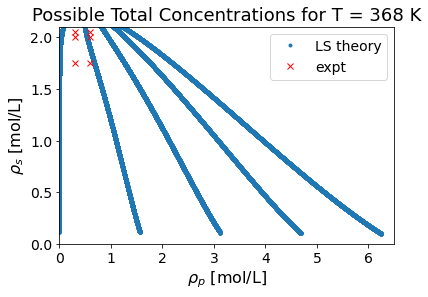

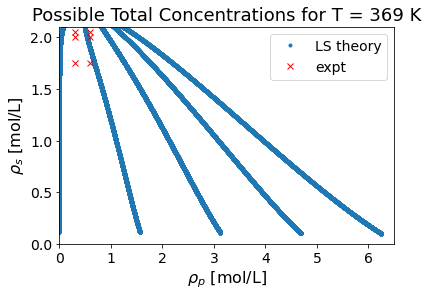

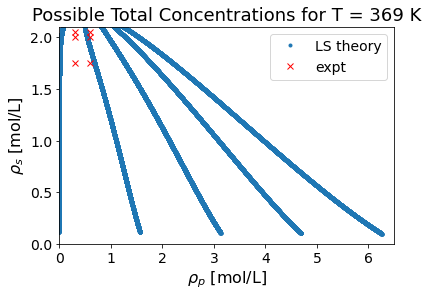

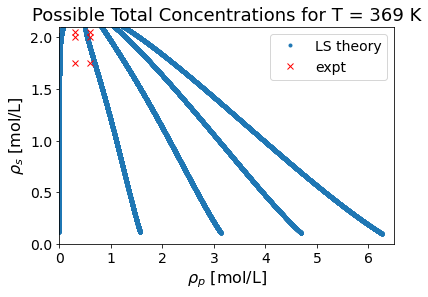

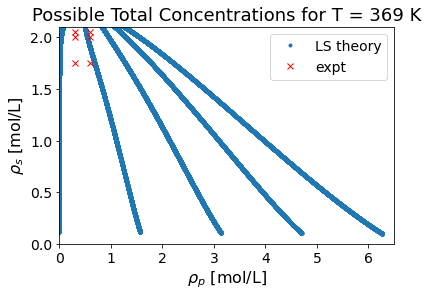

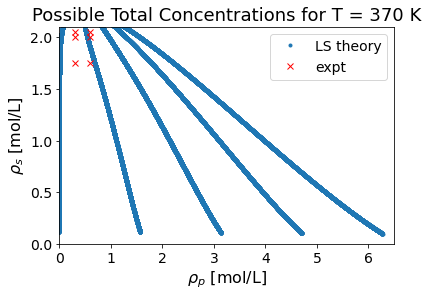

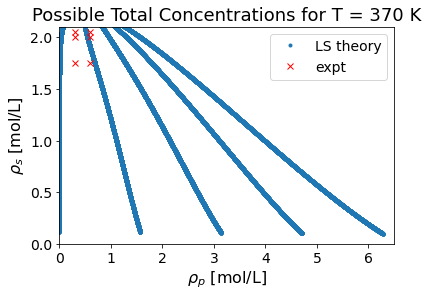

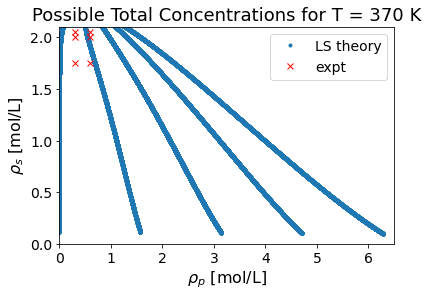

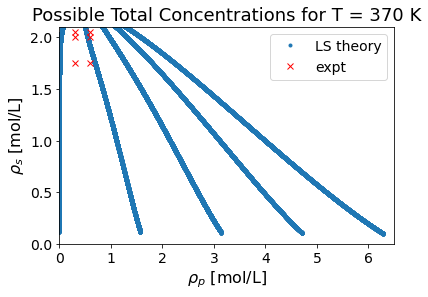

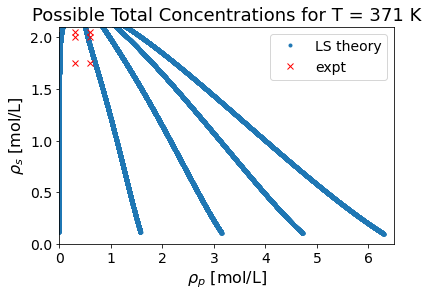

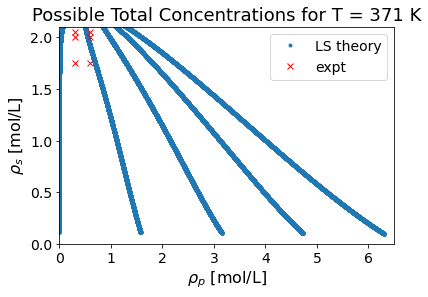

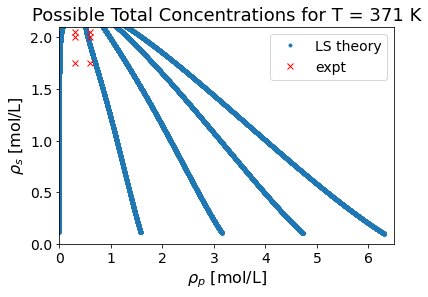

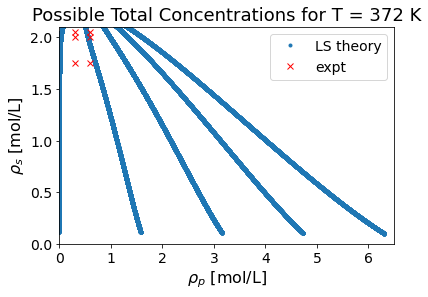

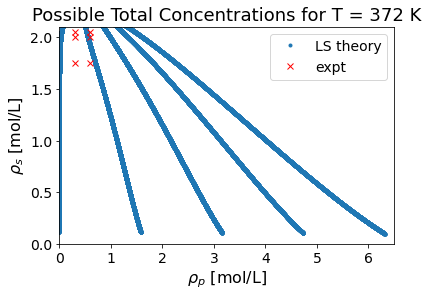

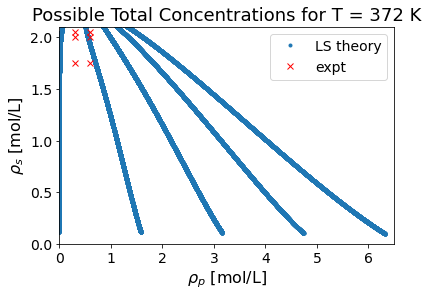

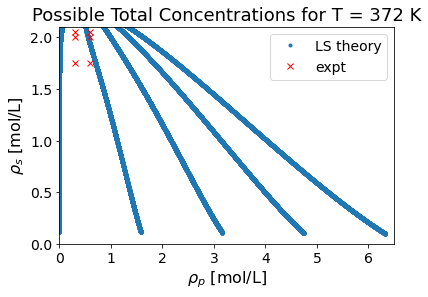

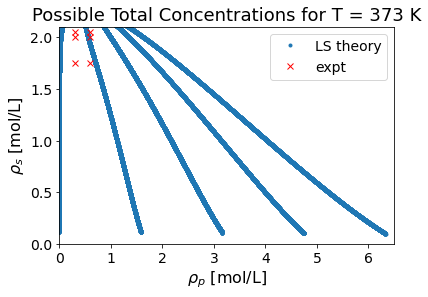

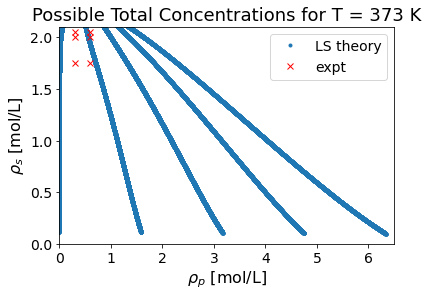

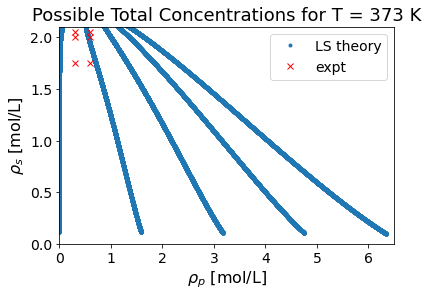

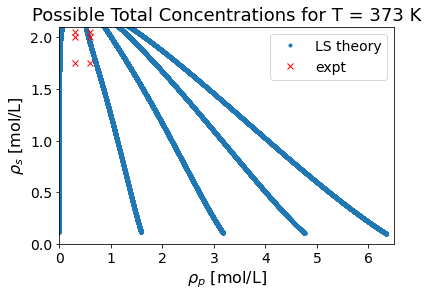

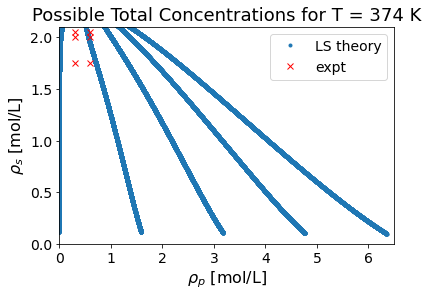

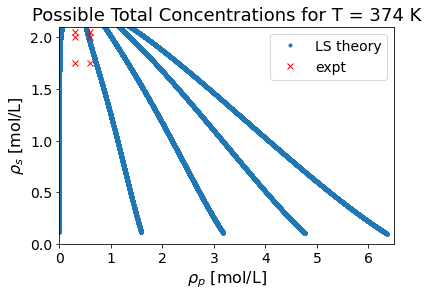

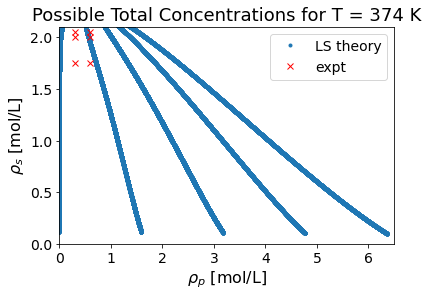

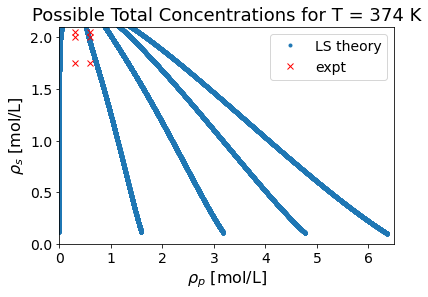

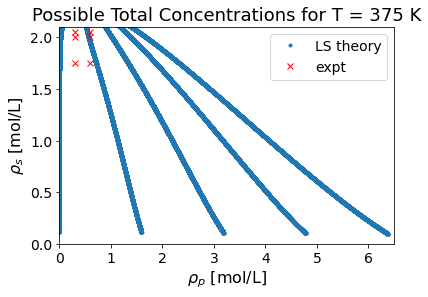

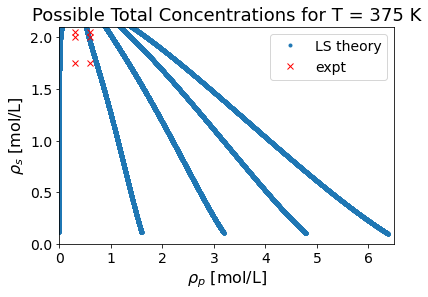

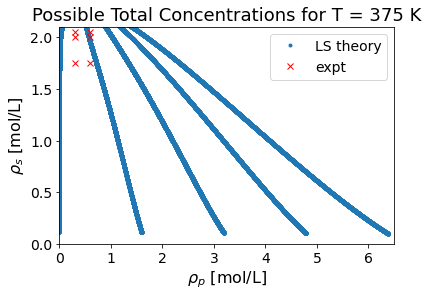

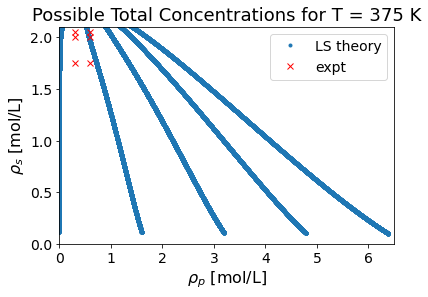

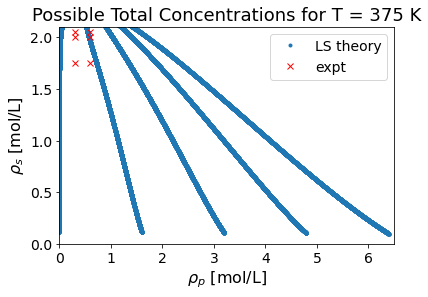

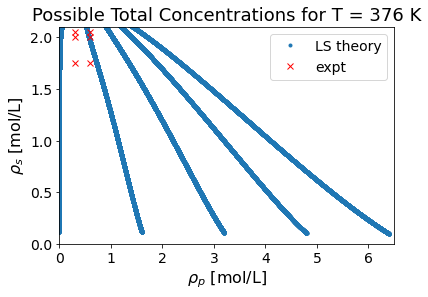

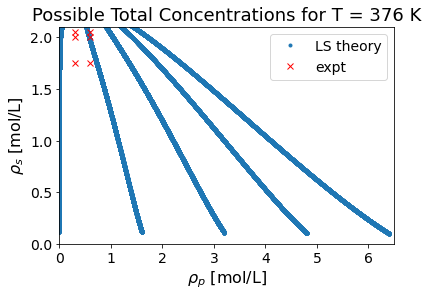

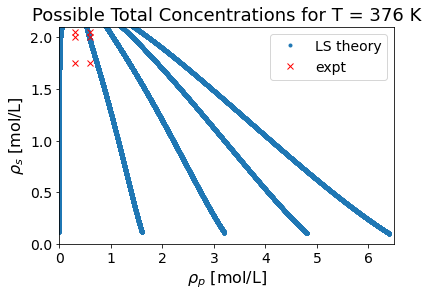

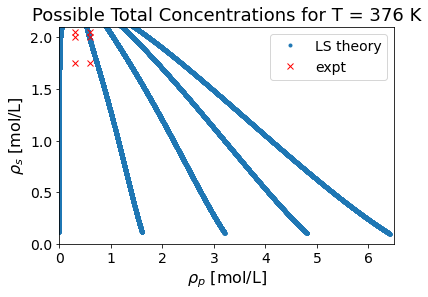

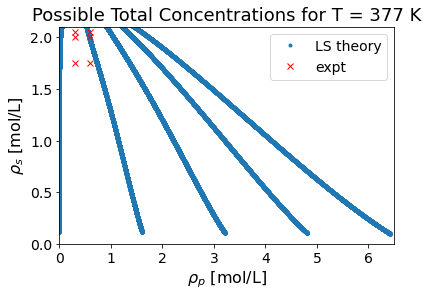

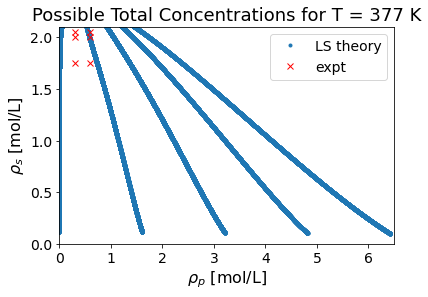

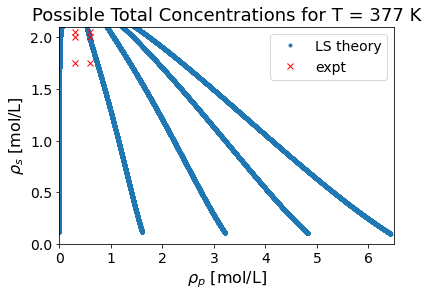

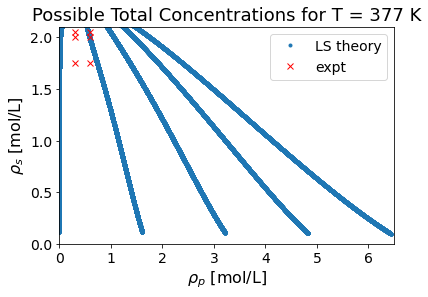

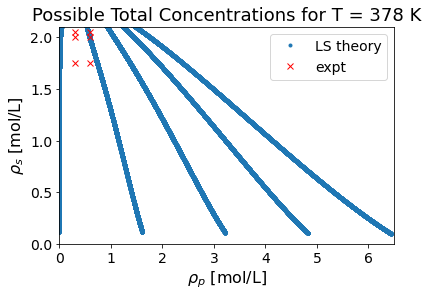

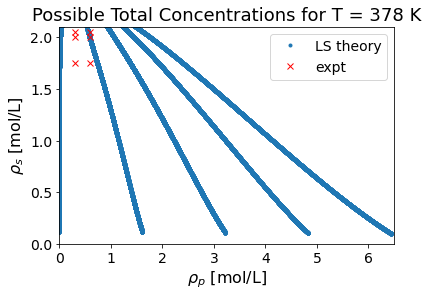

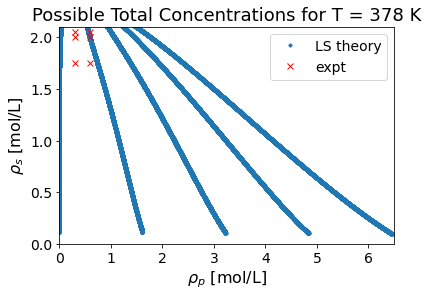

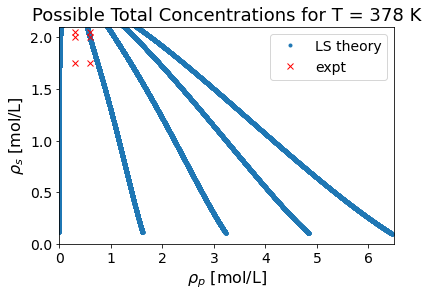

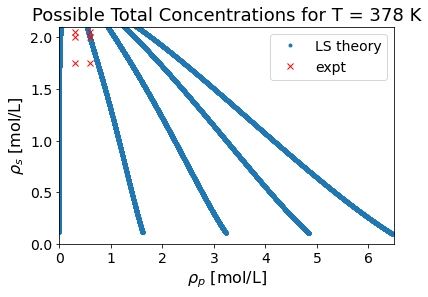

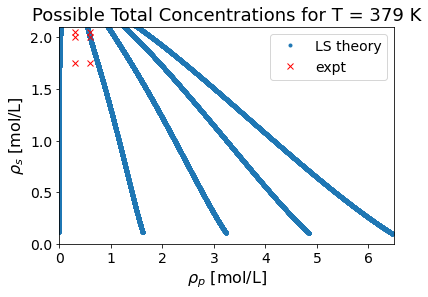

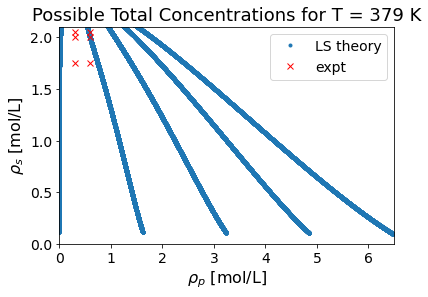

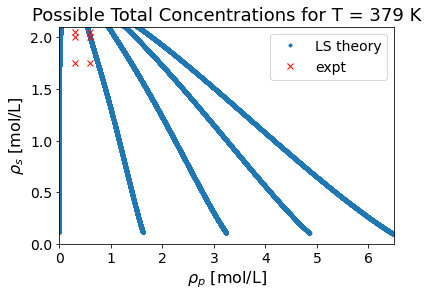

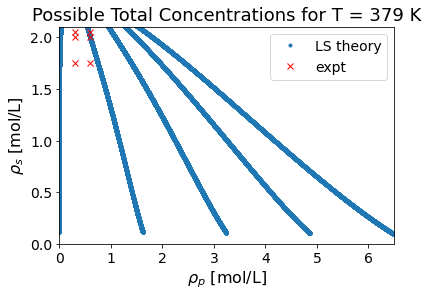

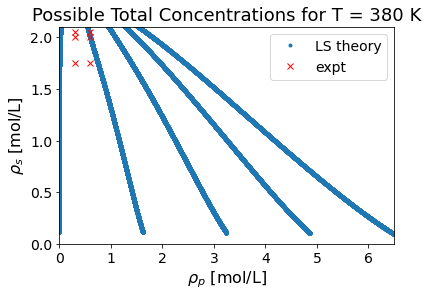

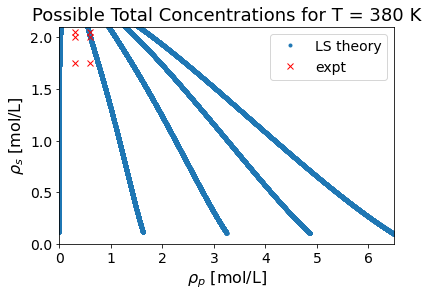

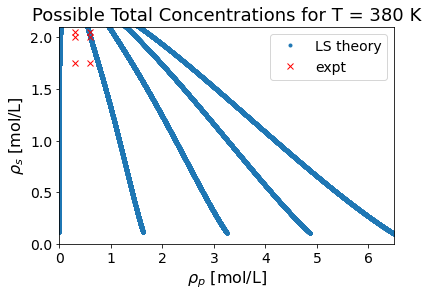

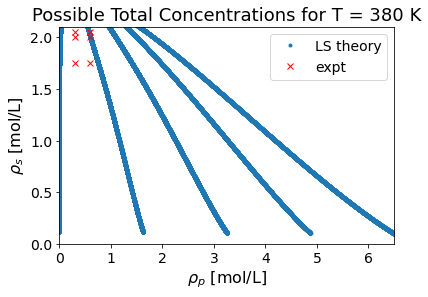

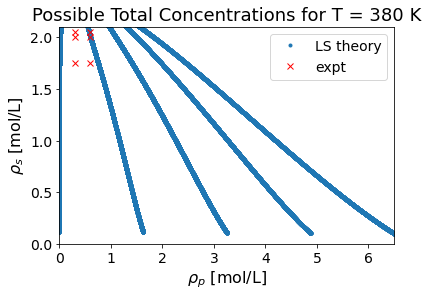

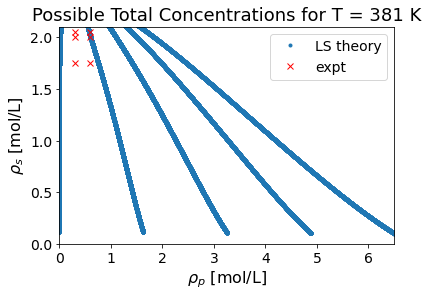

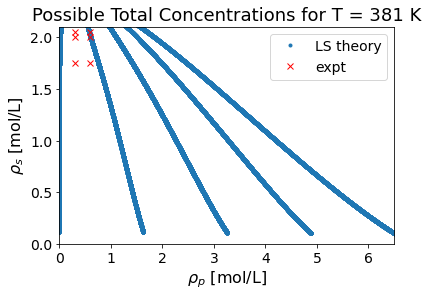

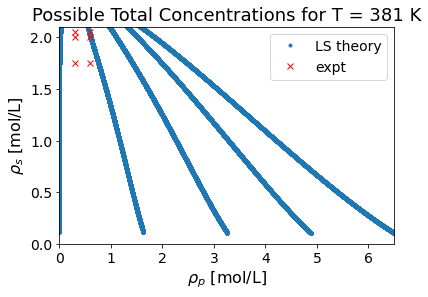

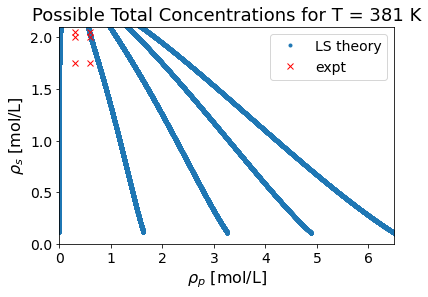

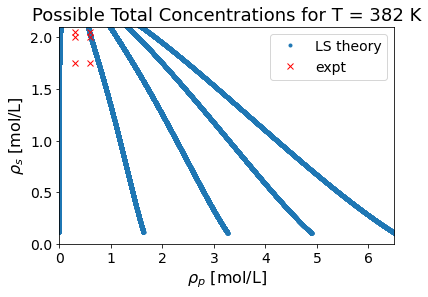

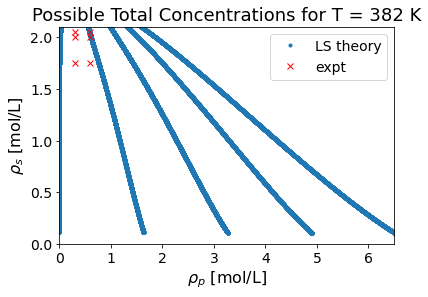

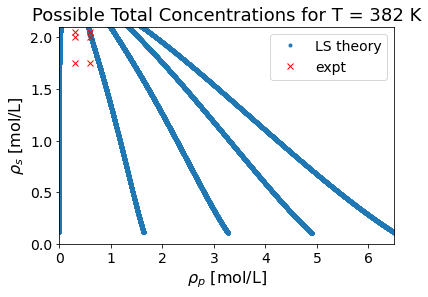

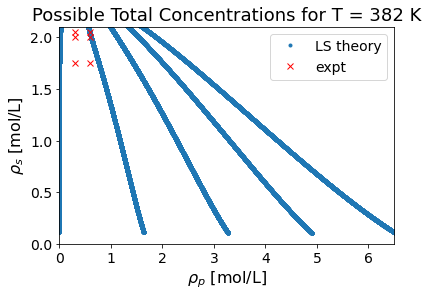

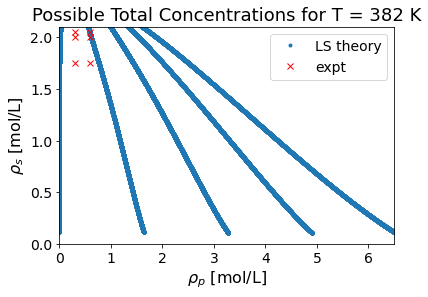

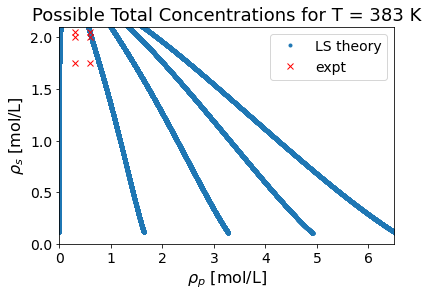

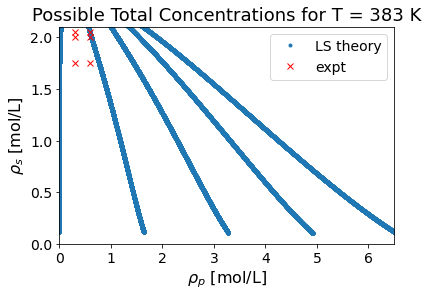

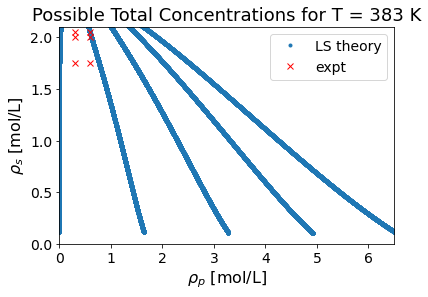

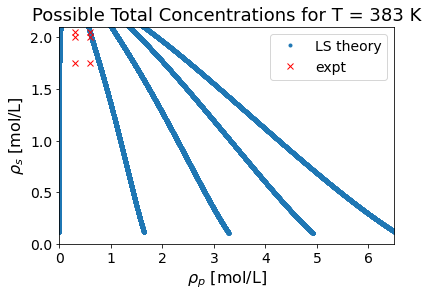

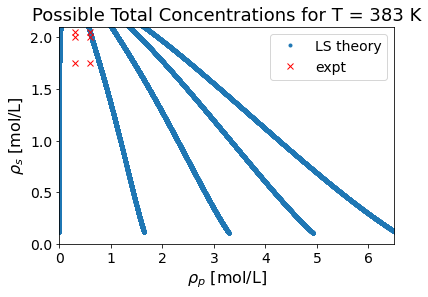

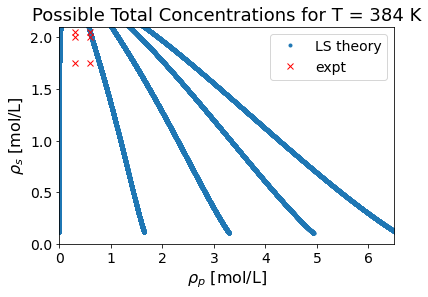

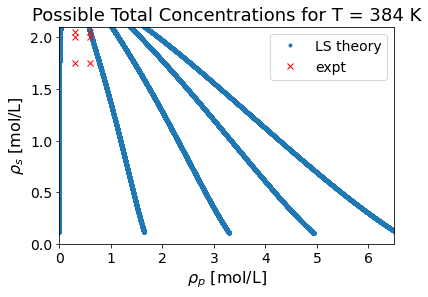

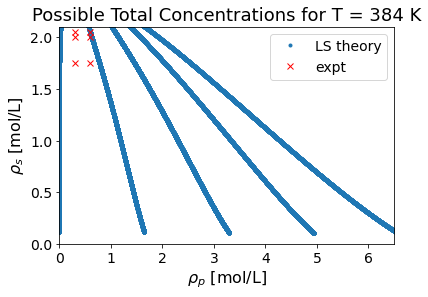

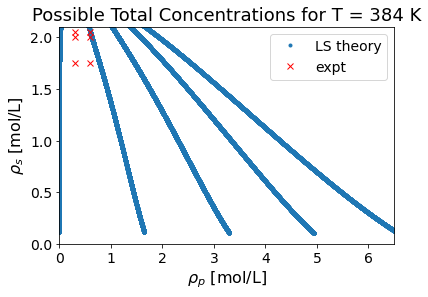

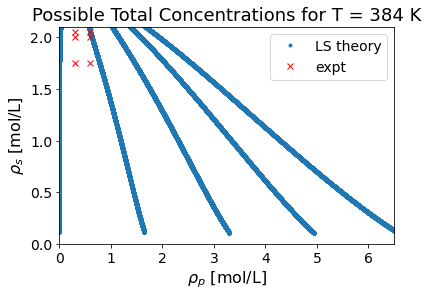

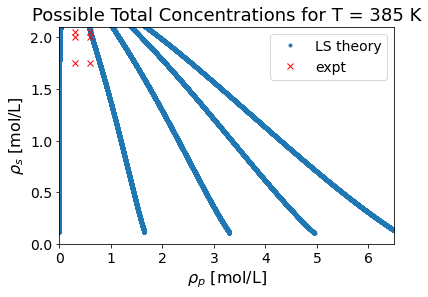

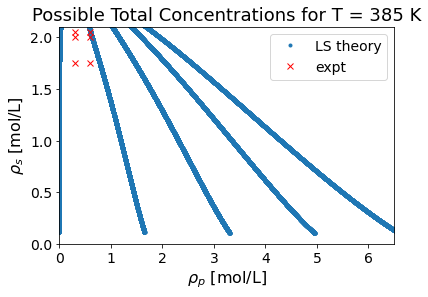

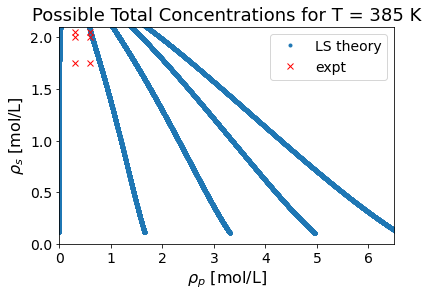

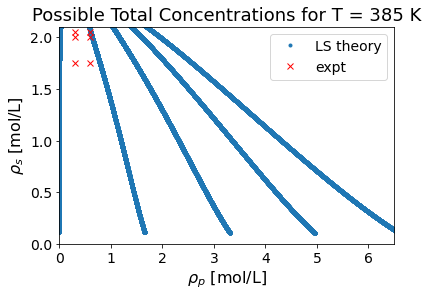

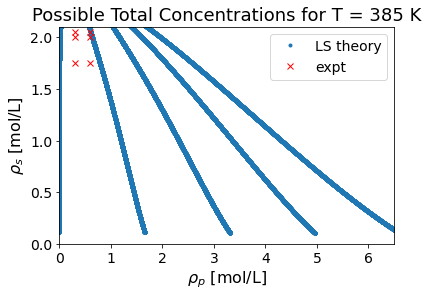

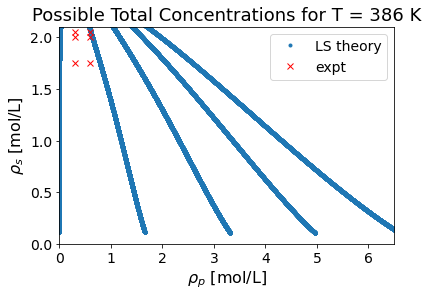

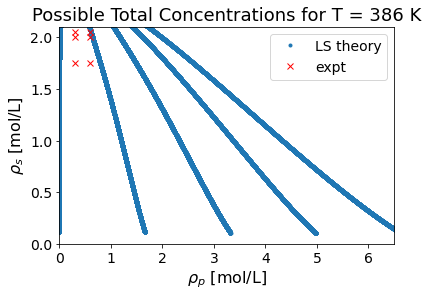

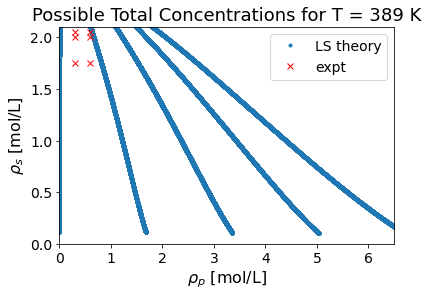

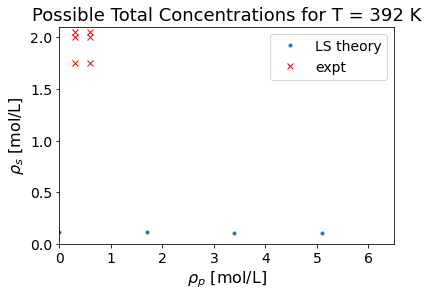

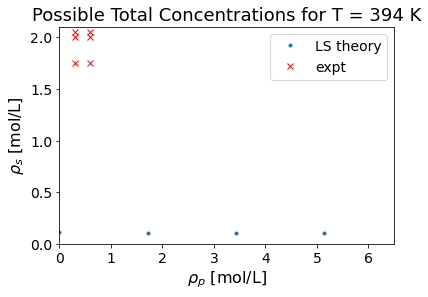

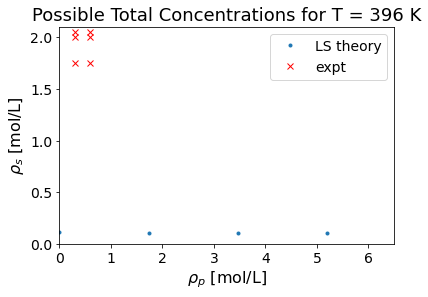

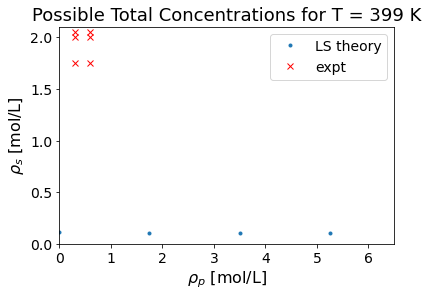

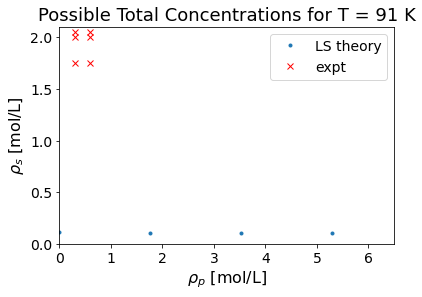

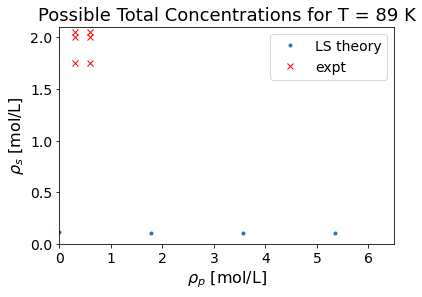

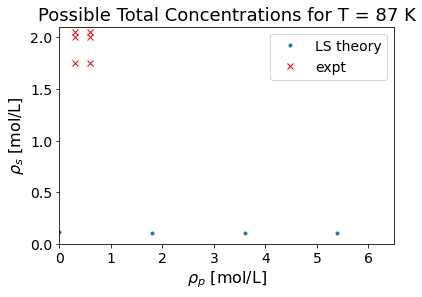

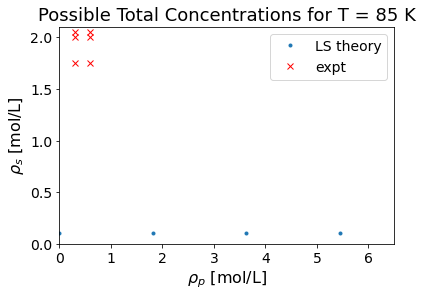

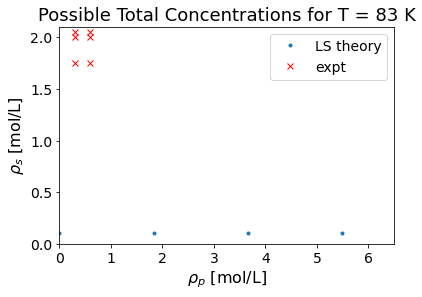

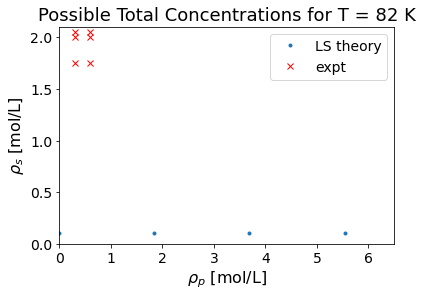

In [5]:
n_pts = 5#50
alpha_list = np.linspace(0, 1, n_pts)
rho_p_max = 6.5 # [mol/L]
rho_s_max = 2.1 # [mol/L]
rho_p_expt = 3*[0.3] + 3*[0.6] # [mol/L], from fig 3 of Ali et al 2019
rho_s_expt = 2*[1.75, 2.0, 2.05] # [mol/L], from fig 3 of Ali et al 2019

for lB in data.keys():
    rho_p_list = []
    rho_s_list = []
    df = data[lB]
    for alpha in alpha_list:
        rho_p_list += list(2 * ( alpha*df['rhoPCI'] + (1-alpha)*df['rhoPCII'] ) * beads_2_M)
        rho_s_list += list(( alpha*df['rhoCI'] + (1-alpha)*df['rhoCII'] ) * beads_2_M)
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(rho_p_list, rho_s_list, '.', label='LS theory')
    
    # plot desired data point
    ax.plot(rho_p_expt, rho_s_expt, 'rx', ms=6, label='expt')
    ax.set_xlabel(r'$\rho_p$ [mol/L]', fontsize=16)
    ax.set_ylabel(r'$\rho_s$ [mol/L]', fontsize=16)
    ax.set_title('Possible Total Concentrations for T = {0:d} K'.format(int(pe.lB_2_T(lB))), fontsize=18)
    ax.tick_params(axis='both', labelsize=14)

    ax.set_xlim([0, rho_p_max])
    ax.set_ylim([0, rho_s_max])
    
    plt.legend(fontsize=14)

In [6]:
rho_s_max = np.max(np.array([rho_s for rho_s in rho_s_list if not np.isnan(rho_s)]))
i_s_max = np.where(rho_s_list == rho_s_max)[0][0]
print(i_s_max)
rho_p_list[i_s_max]

4


4.281054746222844e-63

For temperatures resulting in liquid water (273-373 K), we see that the experiments from Ali et al. 2019 with the lowest salt concentration (1.75 mol/L) are within the two-phase concentrations of this model. The higher salt concentrations (2.0 and 2.05 mol/L), however, are beyond the range of two-phase concentrations predicted.

However, the paper gives information about the critical temperature for different concentrations of polymer and salt (see below).

<div>
    <img src="figures/ali_et_al_2019_tc_fig2.jpeg" alt="Drawing" style="width: 200px;"/>
</div>

We can find the critical temperature for the liquid-state theory calculations at different total concentrations and scale the experimental and theoretical values so I can at least make a comparison.

I realize now that the possible range of polymer concentrations depends on the fixed salt concentration and vice-versa, so I might not be able to get physical results for polymer concentration and salt concentrations at the maximum values. To gain a 

Plot binodal as a function of temperature.

In [28]:
reload(plot)
# sets total polymer and salt concentrations [mol/L]
rho_p = 0.6
rho_s = 1.9
T_range = [273, 333]

rho_PCI_list, rho_PCII_list, _, _, lB_arr, _ = salt.fixed_rho_total(data, rho_p, rho_s, beads_2_M)

# plots binodal
title = '{0:.2f} M Salt, {1:.2f} M Polymer'.format(rho_s, rho_p)
p = plot.binodal(lB_arr, rho_PCI_list, rho_PCII_list, title=title, beads_2_M=1, n_tie_lines=0, deg_C=True, 
                 T_range=T_range)

# sets range of plot
p.x_range = Range1d(-0.05, 1.3)
p.y_range = Range1d(0, 60)
show(p)

### Effect of Total Polymer Concentration on the Width of the Binodal

To understand the effect of the total polymer concentration on the width of the binodal, I will plot both results on the same plot. This is more easily done in `matplotlib`.

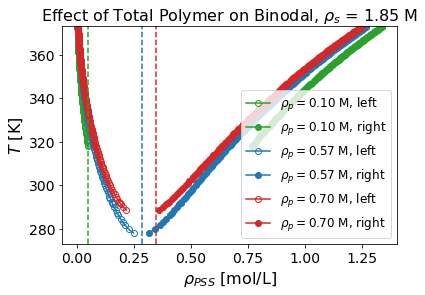

In [36]:
reload(plot)
# sets total concentrations [M]
rho_s = 1.85
rho_p_list = [0.1, 0.57, 0.7]

colors = ['tab:green', 'tab:blue', 'tab:red']

ax = plot.binodal_vary_rho(data, rho_p_list, rho_s, 'p', beads_2_M, colors=colors, lgnd_out=False)
for i in range(len(rho_p_list)):
    ax.plot([rho_p_list[i]/2, rho_p_list[i]/2], ax.get_ylim(), color=colors[i], ls='--')

### Agreement of Effect of Total Polymer Concentration on LCST

Increasing the total polymer concentration from 0.57 M to 0.7 M at a salt concentration of 1.85 M increased the critical temperature from about 280 K to about 290 K. This result is consistent with the experimental finding that the critical temperature increased from about 5 C to about 10 C under the same change in polymer concentration, although at 2 M salt concentration.

If I increase the overall salt concentration, the model will predict a higher LCST, so I selected 1.85 M to match the LCSTs observed in the experiment more closely.

### Disagreement of Effect of Total Polymer Concentration on Critical Polymer Concentration

I


### Effect of Salt on Binodal and Critical Temperature

As in Figure 3 of Ali et al. (2019), we want to examine the effect of increasing the total salt concentration on both the width of the binodal and the critical temperature (LCST).

<div>
    <img src="figures/ali_et_al_2019_salt_effect_fig3.jpeg" alt="Drawing" style="width: 200px;"/>
</div>

Coexistence curves for KPSS/PDADMAB mixture at $C_{KBr}$ = (a) 1.75, (b) 2.0, and (c) 2.05 mol/L showing the two-phase (2$\Phi$) and one-phase (1$\Phi$) region. The initial PSS concentration was 0.15 mol/L (circles) and 0.3 mol/L (squares) that phase separates into the supernatant (open symbols) and concentrated phases (filled symbols) at the given temperature. Measured $T_{cp}$ at $C_{PSS}$ = 0.15 mol/L (up triangle) and 0.3 mol/L (down triangle) are indicated in (b) and (c). Error bars represent one standard deviation estimated from the uncertainty in the sampling micropipette volumes. While error bars are shown, they may be smaller than the symbols used.

We see that increasing the total salt narrows the binodal and raises the lower critical solution temperature. Let's see if the liquid state theory predicts this trend as well.

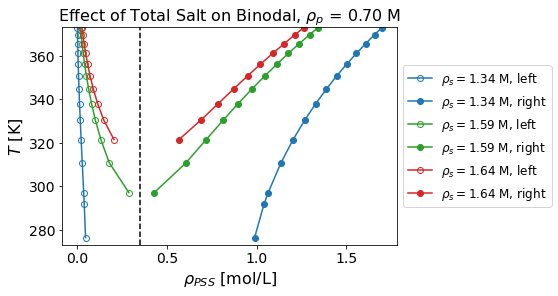

In [22]:
data = salt.load_data(data_folder, N=50)

# sets total concentrations [M]
rho_s_list = [1.34, 1.59, 1.64]
rho_p = 0.7

colors=['tab:blue', 'tab:green', 'tab:red']

ax = plot.binodal_vary_rho(data, rho_s_list, rho_p, 's', beads_2_M, colors=colors)
ax. plot([rho_p/2, rho_p/2], ax.get_ylim(), 'k--')

In [ ]:
##### data = salt.load_data(data_folder)

# sets total concentrations [M]
rho_s_list = [1.60, 1.85, 1.90]
rho_p = 0.6

colors=['tab:blue', 'tab:green', 'tab:red']

ax = plot.binodal_vary_rho(data, rho_s_list, rho_p, 's', beads_2_M, colors=colors)
ax. plot([rho_p/2, rho_p/2], ax.get_ylim(), 'k--')

# Replicate UCST Behavior Reported in Ye et al. 2020

Can I replicate UCST at $C_p = 0.15~M$ as reported in Ye et al. 2020?

In [ ]:
# sets total concentrations [M]
rho_s_list = [1.34, 1.59, 1.64]
rho_p = 0.15

ax = plot.binodal_vary_rho_s(data, rho_s_list, rho_p, beads_2_M, colors=colors)

**No, I cannot replicate UCST behavior with these parameters.** I need to include a $\chi$ parameter. See `ucst_lcst.ipynb` for demonstration of UCST and LCST under the same total concentrations.

## Wider Exploration of Effect of Polymer Density

Previously, we showed that the binodal narrows with increasing polymer density from 0.3 to 0.6 M. This trend is opposite that reported in Ali et al. (2019). Before attempting to develop a physical basis for this trend, I will check if it is monotonic throughout a larger range of polymer concentrations.

C:\Users\andyl\anaconda3\envs\py36\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning:

The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.

C:\Users\andyl\anaconda3\envs\py36\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning:

The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.

C:\Users\andyl\anaconda3\envs\py36\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning:

The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.

C:\Users\andyl\anaconda3\envs\py36\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning:

The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.

C:\Users\andyl\anaconda3\envs\py36\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning:

The iteration is not making good progress

C:\Users\andyl\anaconda3\envs\py36\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning:

The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.

C:\Users\andyl\anaconda3\envs\py36\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning:

The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.

C:\Users\andyl\anaconda3\envs\py36\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning:

The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.

C:\Users\andyl\anaconda3\envs\py36\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning:

The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.

C:\Users\andyl\anaconda3\envs\py36\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning:

The iteration is not making good progress

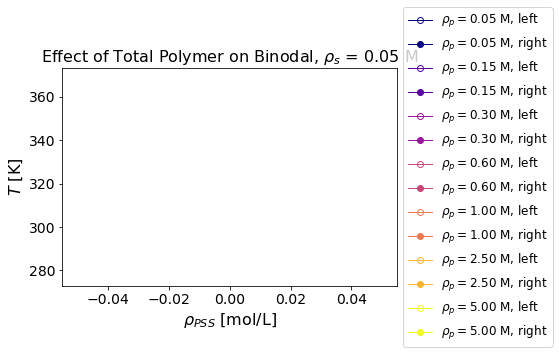

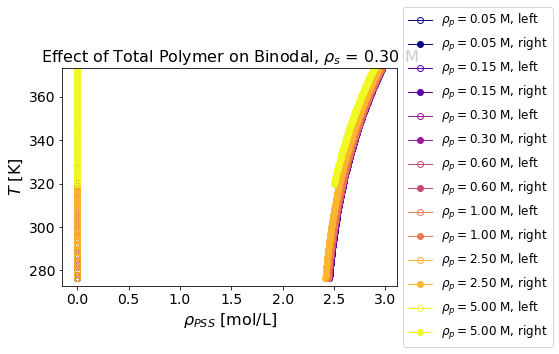

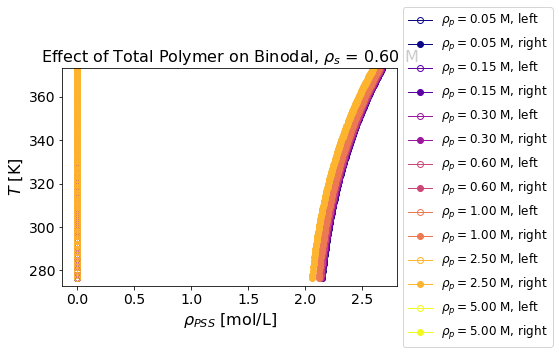

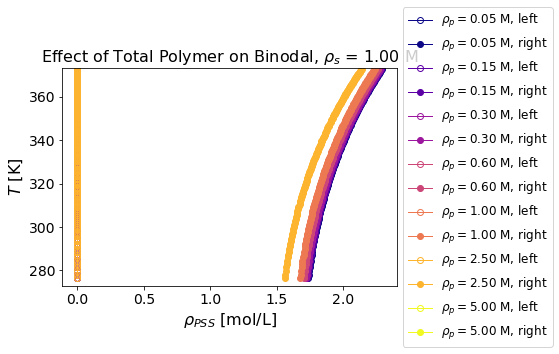

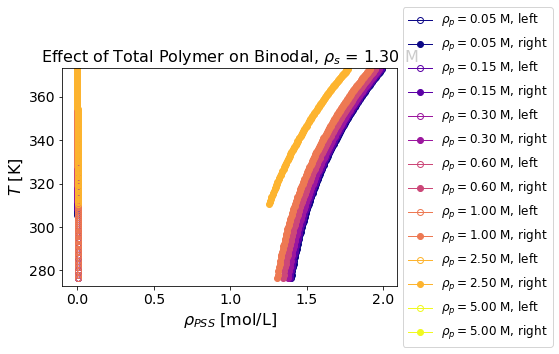

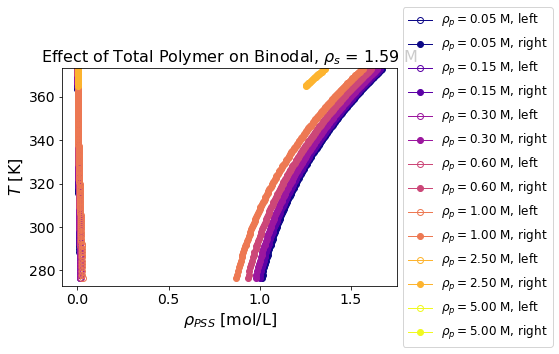

In [3]:
# sets total concentrations [M]
rho_p_list = [0.05, 0.15, 0.3, 0.6, 1.0, 2.5, 5.0]
rho_s_list = [0.05, 0.3, 0.6, 1.0, 1.3, 1.59]

for rho_s in rho_s_list:
    ax = plot.binodal_vary_rho(data, rho_p_list, rho_s, 'p', beads_2_M)